# **Project Name**    - Online Retail Customer Segmentation

##### **Project Type**    -Unsupervised
##### **Contribution**    - Individual
##### **Name** - Kunika Soni
##### **Email** - sonikunika901@gmail.com

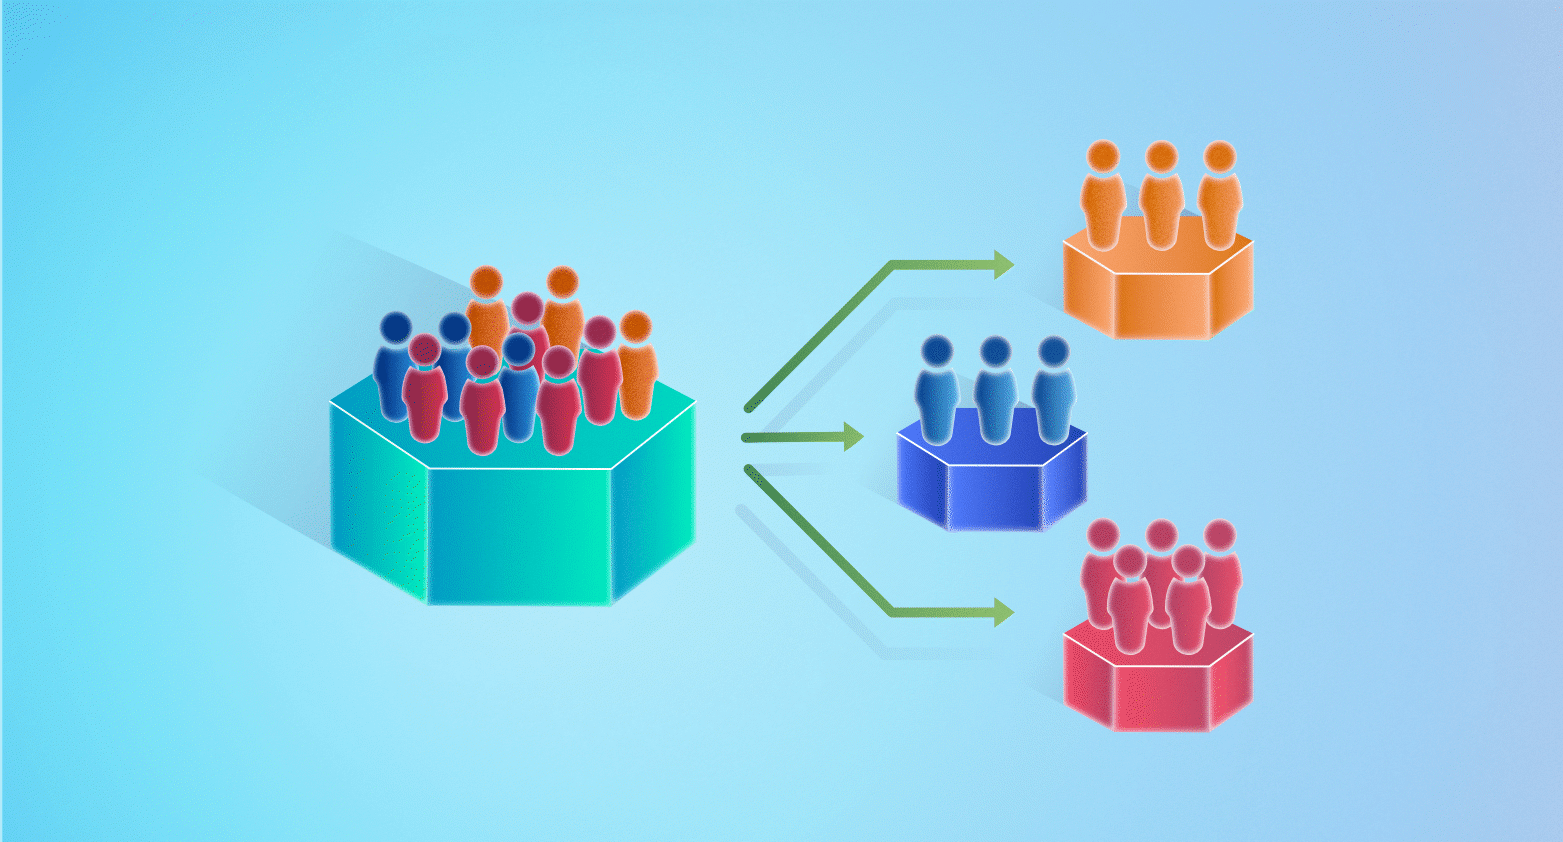

# **Project Summary -**

In business terms, we can say that 20% of customers contribute 80% share of the total revenue of a company. That’s why finding this set of people is important.

### **Understanding Customer Segmentation**

• Customer segmentation is the process of separating a company's customers into groups based on their shared characteristics. The purpose of customer segmentation is to determine how to relate to customers in each category in order to optimize each customer's value to the company.

• Customer segmentation has the ability to help marketers reach out to each customer in the most efficient way possible. A customer segmentation study uses the huge quantity of data available on customers (and future customers) to identify distinct groups of consumers with a high degree of accuracy based on demographic, behavioural, and other characteristics.

• Insights from customer segmentation are used to develop tailor-made marketing campaigns and for designing overall marketing strategy and planning.

• To conclude, we saw how we can segment our customer depending on our business requirements. You can perform RFM for your entire customer base, or just a subset. For example, you may first segment customers based on a geographical area or other demographics, and then by RFM for historical, transaction-based behaviour segments.

• RFM analysis can help in answering many questions with respect to their customers and this can help companies to make marketing strategies for their customers, retaining their slipping customers and providing recommendations to their customer based on their interest. We used the K-means algorithm to segment our customer in various clusters having similar similarity. I think K-means did a pretty good job here.



##**Project/Colab Overview**

• Feature summary

• Insights from our Dataset

• Analysis on unique values in each column

• Analysis on top Country

• Analysis on top products

• Analysis on  cancelled order

• Distribution

• Analysis on Customer data

• Analysis of  Negative Quantities

• RFM MODEL

• Recency

• Frequency

• Monetary

• QQ Plot on R-M-F

• Outlier treatment (IQR Process)

• Modelling

• K-Means clustering

• Silhouette  Analysis

• Elbow method

• Box plot on R-F-M

• Hierarchical clustering

• 3-D visualization on R-F-M

• Challenges

• Solution to Business Objective

• Conclusion

# **GitHub Link -**

https://github.com/kunikasoni/Online_Retail_Customer_segmentation_unsupervised

# **Problem Statement**

In this project, our task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

**BUSINESS PROBLEM OVERVIEW**

The goal of this  is to use cluster analysis to identify important consumer categories in a transnational data set that encompasses all transactions for a UK-based and registered non-store internet retailer over a specific time period.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.

        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.

[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import scipy
import scipy.stats as stat
import math
import sklearn
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import plotly.express as px
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

## Libraries for Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

### Dataset Loading

In [3]:
# Mounting Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Importing the dataset
df = pd.read_csv('/content/drive/MyDrive/Online retail segmentation/Online Retail.xlsx - Online Retail.csv')

### Dataset First View

In [5]:
# Dataset First view
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns
df.shape

(541909, 8)

### Dataset Information

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

5268

In [9]:
#dropping the duplicate data
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(536641, 8)

#### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64


<Axes: >

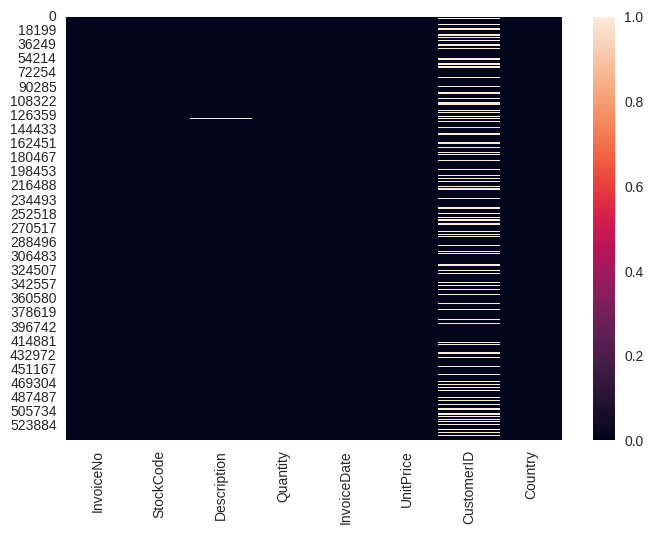

In [12]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=True)

### What did you know about your dataset?

• Total Rows : 541909, Total Column: 8

• A transactional data set with transactions occurring between 1st December   2010 and 9th December 2011 for a UK-based online retailer.
 Many customers of the company are wholesalers.

• There are a lot of null values in Description & Customer ID.

• There are 5268 duplicates values in our dataset

## ***2. Understanding Your Variables***

In [13]:
# Dataset Columns
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [14]:
# check datatypes
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [15]:
# Dataset Describe
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,536641,536641,535187,536641.000000,536641,536641.000000,401604.000000,536641
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,10/31/11 14:41,NaN,NaN,United Kingdom
freq,1114,2301,2357,NaN,1114,NaN,NaN,490300
mean,NaN,NaN,NaN,9.620029,NaN,4.632656,15281.160818,NaN
std,NaN,NaN,NaN,219.130156,NaN,97.233118,1714.006089,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13939.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15145.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16784.000000,NaN


### Variables Description

• InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

• StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

• Description: Product (item) name. Nominal.

• Quantity: The quantities of each product (item) per transaction. Numeric.

• InvoiceDate: Invoice Date and time. Numeric, the day and time when each transaction was generated.

• UnitPrice: Unit price. Numeric, Product price per unit in sterling.

• CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

• Country: The name of country where the customer resides.

### Check Unique Values for each variable.

In [16]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  InvoiceNo is 25900 .
No. of unique values in  StockCode is 4070 .
No. of unique values in  Description is 4223 .
No. of unique values in  Quantity is 722 .
No. of unique values in  InvoiceDate is 23260 .
No. of unique values in  UnitPrice is 1630 .
No. of unique values in  CustomerID is 4372 .
No. of unique values in  Country is 38 .


## 3. ***Data Wrangling***

****1.Finding the top 10 countries which have the highest number of orders.****




In [17]:
#Here, we will analyse the number of countries from which orders were made:
#Code to find the number of countries who made the transaction
temp = df[['CustomerID', 'InvoiceNo', 'Country']].groupby(['CustomerID', 'InvoiceNo', 'Country']).count()
temp = temp.reset_index(drop = False)
countries = temp['Country'].value_counts()
print('No. of countries in the dataframe: {}'.format(len(countries)))

No. of countries in the dataframe: 37


In [18]:
# Apply groupby function on country and Invoice No.
country_count = df.groupby('Country')['InvoiceNo'].count().reset_index()

In [19]:
country_count.head()

,Country,InvoiceNo
0,Australia,1258
1,Austria,401
2,Bahrain,19
3,Belgium,2069
4,Brazil,32


In [20]:
## From country_count variable finding top 10 countries
Top_10_country = country_count.sort_values('InvoiceNo', ascending=False, ignore_index=True).head(10)
Top_10_country

,Country,InvoiceNo
0,United Kingdom,490300
1,Germany,9480
2,France,8541
3,EIRE,8184
4,Spain,2528
5,Netherlands,2371
6,Belgium,2069
7,Switzerland,1994
8,Portugal,1510
9,Australia,1258


In [21]:
## Adding country percentage column to top 10 countries data frame
Top_10_country['Country_percent']= Top_10_country['InvoiceNo']*100/df['InvoiceNo'].count()
Top_10_country

,Country,InvoiceNo,Country_percent
0,United Kingdom,490300,91.364618
1,Germany,9480,1.766544
2,France,8541,1.591567
3,EIRE,8184,1.525042
4,Spain,2528,0.471078
5,Netherlands,2371,0.441822
6,Belgium,2069,0.385546
7,Switzerland,1994,0.371571
8,Portugal,1510,0.281380
9,Australia,1258,0.234421


From the above data we can infer that 'United Kingdom' is the country to have tranacted the highest beign 91.43% ,followed by Germany and France. The country lowest in transaction is Australia.

****2.Checking for canceled orders.****

We have an atrribute named "InvoiceNo:"

**InvoiceNo:** Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

In [22]:
# String to be searched in start of string
search ="C"

# boolean series returned with False at place of NaN
series = df["InvoiceNo"].str.startswith(search, na=False)

# displaying filtered dataframe
cancel_order = df[series]

cancel_order.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/10 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/10 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/10 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom


In [23]:
# Checking the shape of the cancelled order dataset
cancel_order.shape

(9251, 8)

In [24]:
# Checking the percentage of no. of orders cancelled
cancel_percentage = cancel_order['InvoiceNo'].count()*100/df['InvoiceNo'].count()
cancel_percentage

1.7238712658928408

This shows that **9251 (approx 1.72%)** were such orders which were **canceled**.


**Now checking the top 10 countries from where the orders were canceled.**


In [25]:
cancel = cancel_order.groupby('Country')['InvoiceNo'].count().reset_index()
cancel_top10 = cancel.sort_values('InvoiceNo',ascending=False, ignore_index=True).head(10)
cancel_top10

,Country,InvoiceNo
0,United Kingdom,7821
1,Germany,453
2,EIRE,301
3,France,148
4,USA,112
5,Australia,74
6,Spain,48
7,Italy,45
8,Belgium,38
9,Japan,37


**3.Taking a look at the Monthly sales data.**

In [26]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [27]:
# To look at the monthly sales data, first we need to create a separate month column out of date.
# Also lets create separate column for day, month, year etc. and also create columns that contain proper names of months and days.

df['Day_num'] = df['InvoiceDate'].dt.day
df['Month_num'] = df['InvoiceDate'].dt.month
df['Year'] = df['InvoiceDate'].dt.year

# creating columns that contain proper months and day names for better understanding.
df['Month']=df['InvoiceDate'].dt.month_name()
df['Day'] = df['InvoiceDate'].dt.day_name()

# seeing the new data.
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day_num,Month_num,Year,Month,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,12,2010,December,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,2010,December,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,12,2010,December,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,2010,December,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,2010,December,Wednesday


In [28]:
# Looking at monthly sales data.
month_df = df['Month'].value_counts().reset_index()
month_df.columns = ['Month', 'count']
print(month_df.head())

       Month  count
0   November  83343
1   December  67227
2    October  59969
3  September  49861
4       July  39267


In [29]:
# As we can see from above, the months are not ordered. So lets order them before plotting the above data.
# Initialize an ordered months list.
ordered_months_list = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

# We can use categorical index function for ordering our data using the above list as a reference point.
month_df.index = pd.CategoricalIndex(month_df['Month'],categories=ordered_months_list,ordered=True)
month_df = month_df.sort_index().reset_index(drop=True)
month_df

,Month,count
0,January,34900
1,February,27479
2,March,36439
3,April,29701
4,May,36782
5,June,36609
6,July,39267
7,August,35064
8,September,49861
9,October,59969


**4.Taking a look at day wise order placement trend**

In [30]:
# Taking a look at the daily data.
day_df = pd.DataFrame(df['Day'].value_counts().reset_index())
day_df.columns = ['Day','count']
day_df

,Day,count
0,Thursday,103056
1,Tuesday,101064
2,Monday,94435
3,Wednesday,93715
4,Friday,81565
5,Sunday,62806


In [31]:
# As we can see from above, the days are not ordered. So lets order them before plotting the above data.
# Initialize an ordered days name list.
ordered_day_name_list = ["Sunday", "Monday" , "Tuesday" , "Wednesday" , "Thursday" , "Friday" , "Saturday"]

# We can use categorical index function for ordering our data using the above list as a reference point.
day_df.index = pd.CategoricalIndex(day_df['Day'],categories=ordered_day_name_list,ordered=True)
day_df = day_df.sort_index().reset_index(drop=True)
day_df

,Day,count
0,Sunday,62806
1,Monday,94435
2,Tuesday,101064
3,Wednesday,93715
4,Thursday,103056
5,Friday,81565


In [32]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day_num,Month_num,Year,Month,Day
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,9,12,2011,December,Friday
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,9,12,2011,December,Friday
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,9,12,2011,December,Friday
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,9,12,2011,December,Friday
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,9,12,2011,December,Friday


### What all manipulations have you done and insights you found?

•The data in this set comes from the United Kingdom.

• There are 541909 rows and 8 columns in our data collection.

• 'InvoiceNo', 'Stock Code', 'Description', and 'Country' are four categorical features.

• There are missing data in the Description and CustomerID columns, and null values have been removed.

• There are duplicate values, thus they've been removed.


• Duplicate were removed & after dropping duplicates we can see that 5268 values got dropped which is nearly about ~1% of the original dataset.

• After checking for the canceled orders in the dataset  we  found that 9219 (approx 1.72%) were such orders which was canceled.

 •There is 1336 rows having negative quantity and also order were not canceled.
 Also we see that, these cases are the ones where CustomerID values are NaNs. These cases were also removed from the data.

• Customer ID has 134995 Nan Values & Description has 1454 Nan Values. Drop the Nan values to make data more cleaned.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 -Bar plot of number of unique values each column

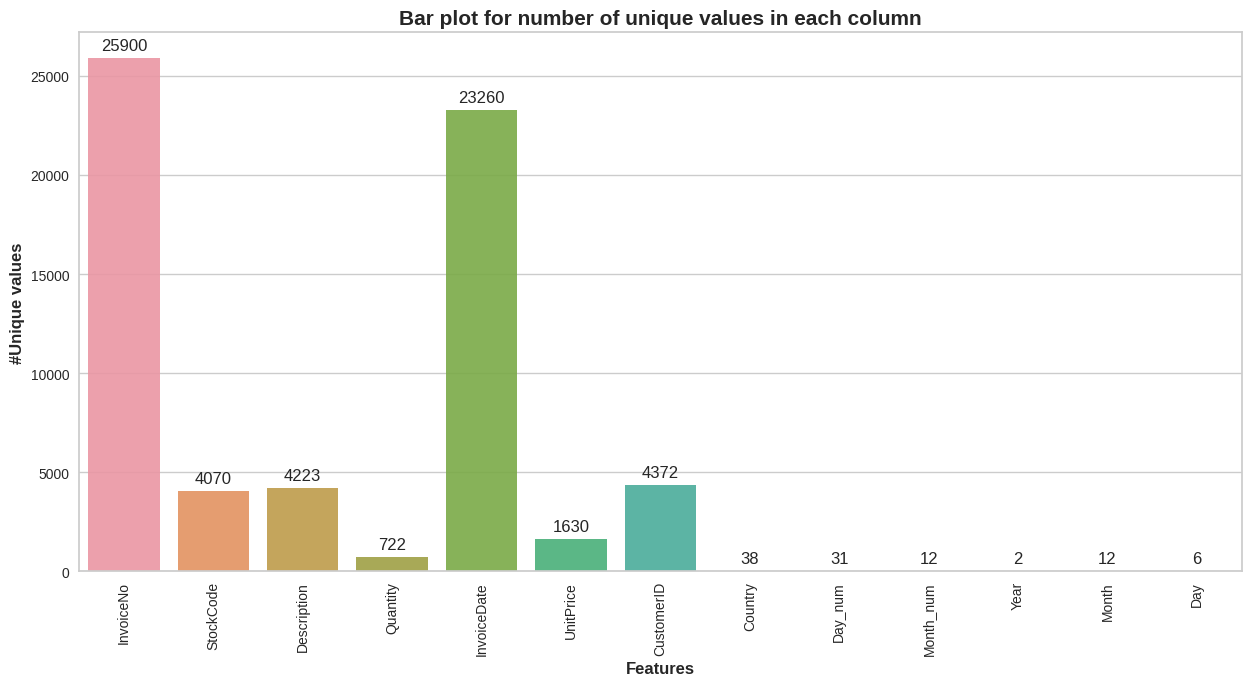

In [33]:
#Chart-1 visualization code
# Plotting bar plot for number of unique values in each column

unique_df=pd.DataFrame()
unique_df['Features']=df.columns
unique=[]
for i in df.columns:
  unique.append(df[i].nunique())
unique_df['Uniques']=unique

f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.9)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('#Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

As we can see 'InvoiceNo' and 'InvoiceDate' have highest no. of unique values.

#### Chart - 2 - Line plot on customer distribution in 1 year time period

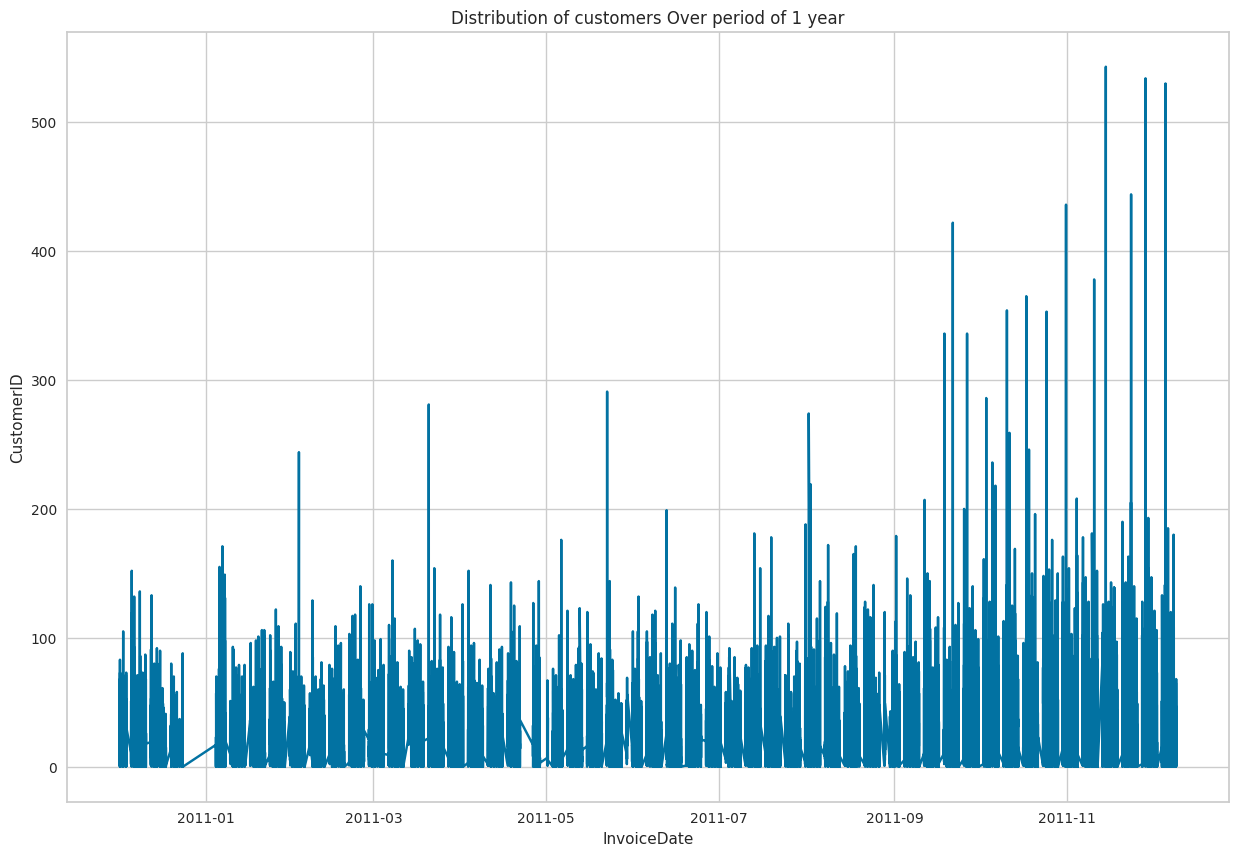

In [34]:
## customer distribution in 1 year time period
sns.set_style('whitegrid')
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = (15,10)

customer_distribution = df.groupby('InvoiceDate').count()['CustomerID'].reset_index()
customer_distribution
sns.lineplot(data=customer_distribution , x="InvoiceDate"  , y="CustomerID" ).set(title = "Distribution of customers Over period of 1 year")
plt.show()

From the plot we can see that more number of custromers have transactioned in the month of November 2011.Comparitively less customers have trasactioned in the remaining months.

#### Chart - 3 - Bar plot on the  countries and their transaction percentage.

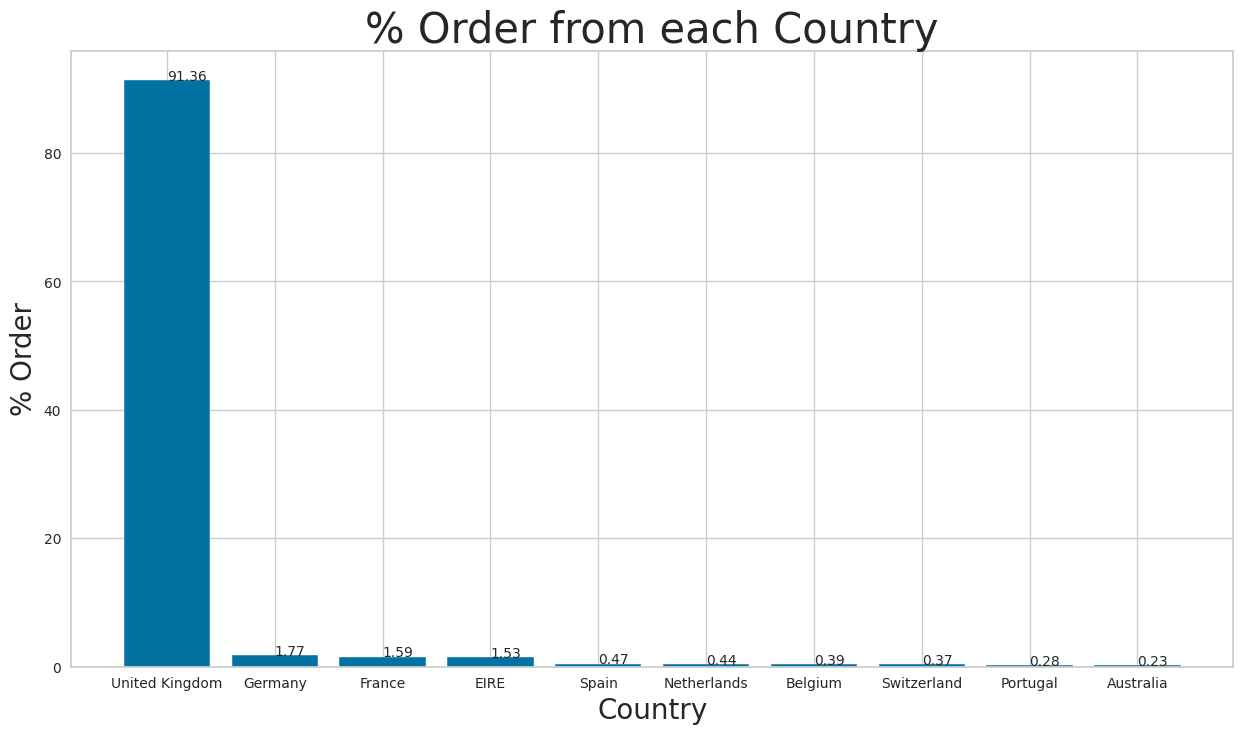

In [35]:
# Figure Size
plt.figure(figsize=(15,8))

## Define x and y axis
x=Top_10_country['Country']
y=Top_10_country['Country_percent']

# creating the bar plot
plt.bar(x,y)

## Function to set label
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

addlabels(x,round(y,2))

# set xlabel. ylabel and title
plt.xlabel("Country", size=20)
plt.ylabel("% Order", size=20)
plt.title("% Order from each Country", size=30)

## Showing the plot
plt.show()

From the plot , it is evident that the country United Kingdom has the highest transaction percentage followed by Germany and France .The country Australia has the least transaction percentage.

Chart - 4 - Bar plot on Customer Data

In [36]:
customer_df = df.copy()
customer_df['amount'] = customer_df.Quantity*customer_df.UnitPrice
customer_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day_num,Month_num,Year,Month,Day,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,12,2010,December,Wednesday,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,2010,December,Wednesday,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,12,2010,December,Wednesday,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,2010,December,Wednesday,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,2010,December,Wednesday,20.34


In [37]:
#plotting the bar plot
PercentSales = customer_df.groupby(["CustomerID"]).amount.sum().sort_values(ascending = False).iloc[:20].reset_index()
PercentSales.head(10)

,CustomerID,amount
0,14646.0,279489.02
1,18102.0,256438.49
2,17450.0,187322.17
3,14911.0,132458.73
4,12415.0,123725.45
5,14156.0,113214.59
6,17511.0,88125.38
7,16684.0,65892.08
8,13694.0,62690.54
9,15311.0,59284.19


In [38]:
sns.set(rc={'figure.figsize':(18,8)})

<Axes: xlabel='CustomerID', ylabel='amount'>

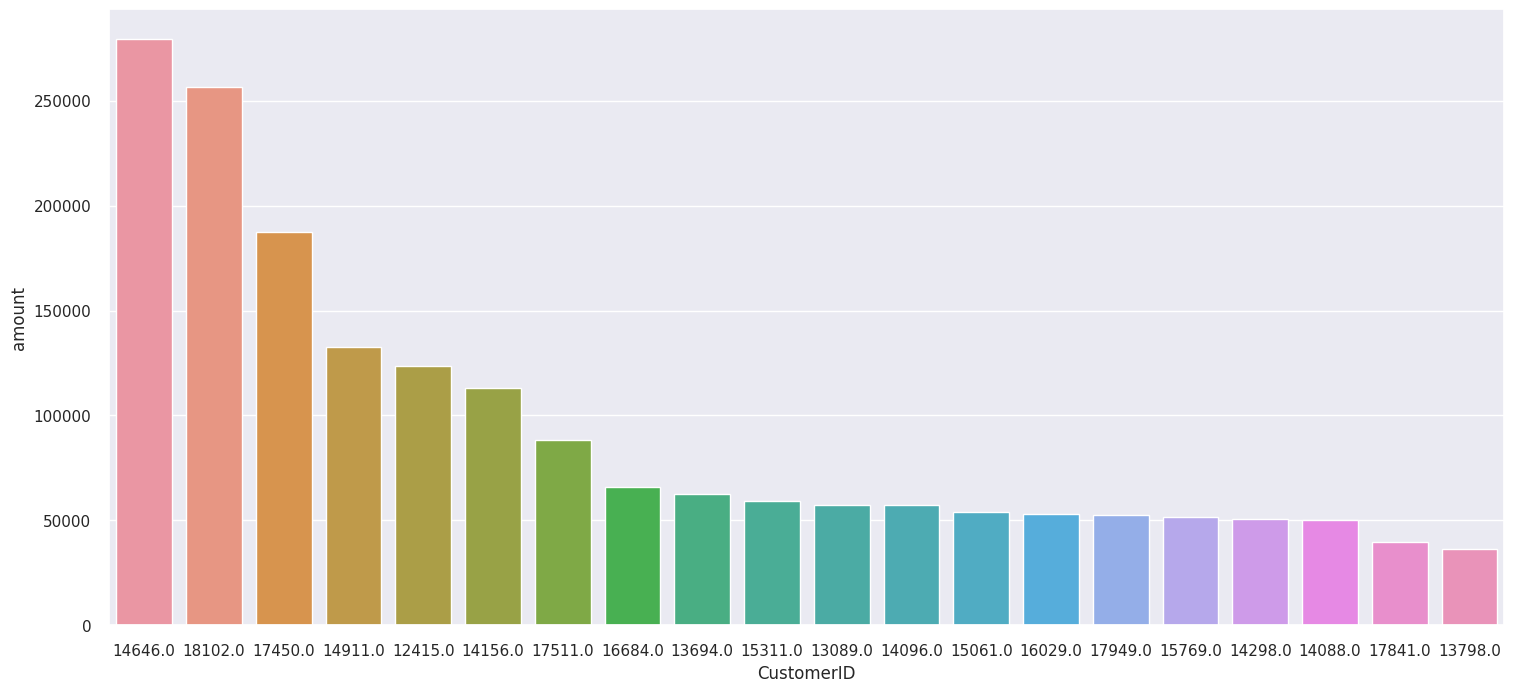

In [39]:
sns.barplot(x="CustomerID", y="amount", data=PercentSales, order=PercentSales['CustomerID'])

Most Amount is spent by customerID (14646.0) which is more than 250000 followed by customerID (18102.0) which is also more than 250000.

Least amount is spent by customer with id 13798 which is less than 50,000



####Chart - 5 Bar plot on Top Products.

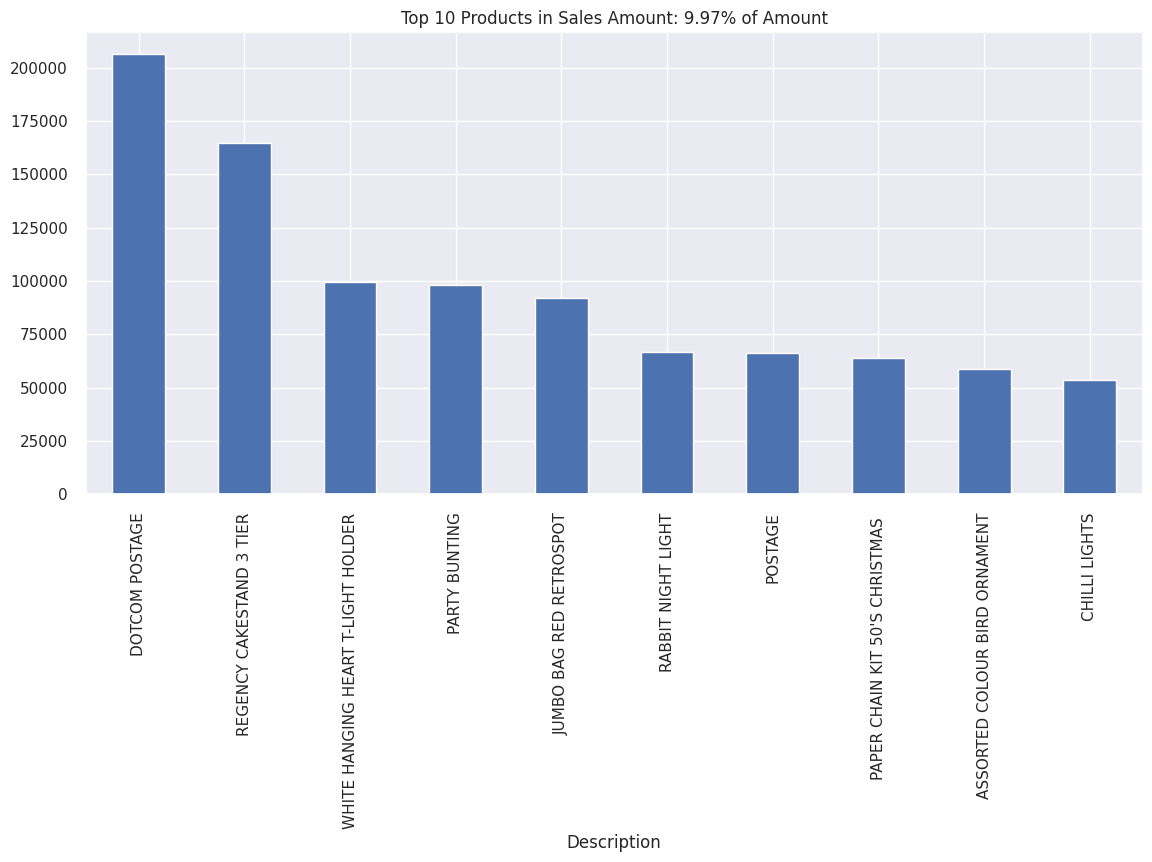

In [40]:
# Plotting a graph for top 10 products
AmoutSum = customer_df.groupby(["Description"]).amount.sum().sort_values(ascending = False)
inv = customer_df[["Description", "InvoiceNo"]].groupby(["Description"]).InvoiceNo.unique().\
      agg(np.size).sort_values(ascending = False)

fig = plt.figure(figsize=(30, 6))
f1 = fig.add_subplot(121)
Top10 = list(AmoutSum[:10].index)
PercentSales =  np.round((AmoutSum[Top10].sum()/AmoutSum.sum()) * 100, 2)

g = AmoutSum[Top10].\
    plot(kind='bar', title='Top 10 Products in Sales Amount: {:3.2f}% of Amount'.\
                       format(PercentSales))

From the plot , we can see that the most common product which is sold is "Dotcom Postage" where as the least popular product which is not sold is "Chilli Lights"

Chart - 6 - chart on top 10 countries with cancellation order

In [41]:
# String to be searched in start of string
search ="C"

# boolean series returned with False at place of NaN
series = df["InvoiceNo"].str.startswith(search, na=False)

# displaying filtered dataframe
cancel_order = df[series]

cancel_order.head(1)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day_num,Month_num,Year,Month,Day
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.5,14527.0,United Kingdom,1,12,2010,December,Wednesday


In [42]:
# lets look at which product has the most number of cancellations.
product_cancellation_data = cancel_order['Description'].value_counts().reset_index().head(10)
product_cancellation_data

,index,Description
0,Manual,244
1,REGENCY CAKESTAND 3 TIER,180
2,POSTAGE,126
3,JAM MAKING SET WITH JARS,87
4,Discount,77
5,SET OF 3 CAKE TINS PANTRY DESIGN,73
6,SAMPLES,60
7,ROSES REGENCY TEACUP AND SAUCER,54
8,STRAWBERRY CERAMIC TRINKET BOX,54
9,RECIPE BOX PANTRY YELLOW DESIGN,47


Text(0.5, 1.0, 'Top 10 Products with most number of cancellations.')

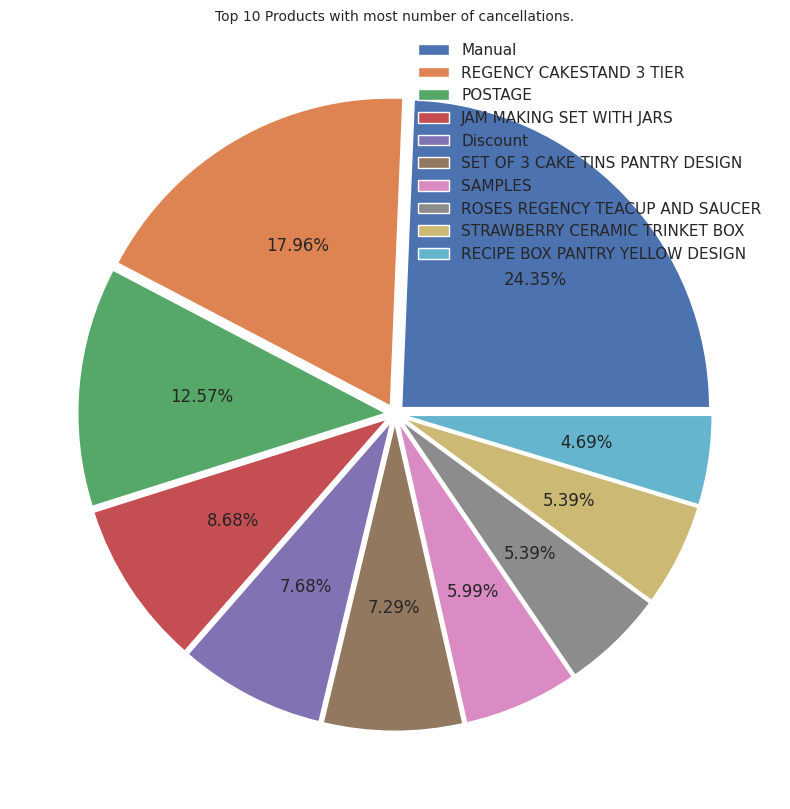

In [43]:
# Plotting the no. of cancellations for products using a pie chart.
plt.figure(figsize=(10,10))
labels=product_cancellation_data['index']                                                    # defining the labels.

explode=[0.03]*len(product_cancellation_data.index)                                          # setting values for exploding a wedge in the chart.
plt.pie(product_cancellation_data['Description'],explode = explode ,autopct='%1.2f%%')       # plotting the pie chart.
plt.legend(labels, loc='upper right')                                                               # setting the legends.

# Setting the title.
plt.title('Top 10 Products with most number of cancellations.', fontsize=10)

Above chart depicts the number of cancellations via product. We can clearly see from the above chart that Manual and Regency Cakestand Tier 3 are the most cancelled products.

In [44]:
cancel_top10 = cancel.sort_values('InvoiceNo',ascending=False, ignore_index=True).head(10)
cancel_top10

,Country,InvoiceNo
0,United Kingdom,7821
1,Germany,453
2,EIRE,301
3,France,148
4,USA,112
5,Australia,74
6,Spain,48
7,Italy,45
8,Belgium,38
9,Japan,37


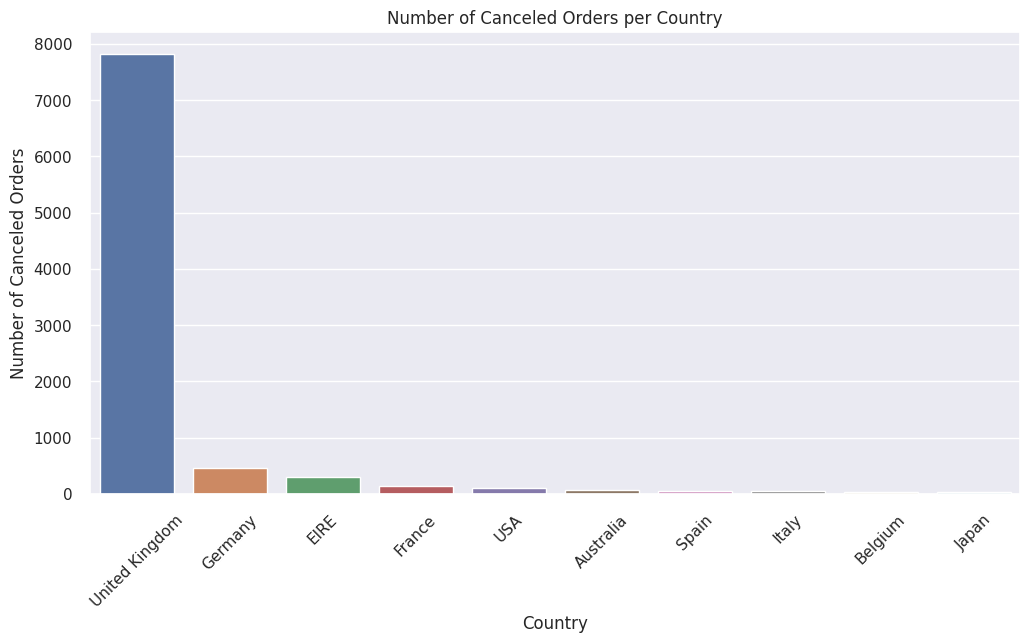

In [45]:
plt.figure(figsize=(12, 6))
sns.barplot(data=cancel_top10, x='Country', y='InvoiceNo')
plt.xlabel('Country')
plt.ylabel('Number of Canceled Orders')
plt.title('Number of Canceled Orders per Country')
# Rotating x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Displaying the plot
plt.show()



Most cancellations have been done by residents of United Kingdom followed by Germany and EIRE (Republic of Ireland).

#### Chart - 7 - Bar plot on Monthly sales data.

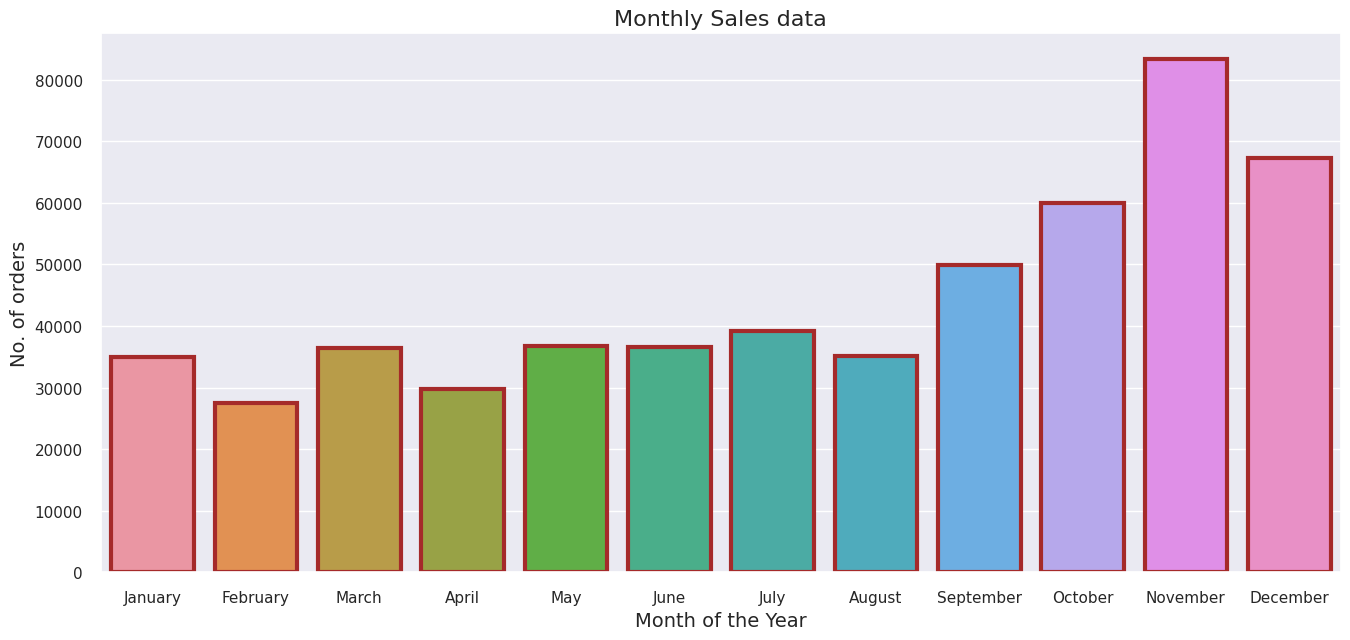

In [46]:
# Plotting the monthly sales data using a barplot.
fig, ax = plt.subplots(figsize = (16,7))
sns.barplot(x='Month', y='count', data=month_df, edgecolor='brown',lw=3)

# Setting the title and the x,y labels.
plt.title('Monthly Sales data', fontsize= 16)
plt.xlabel('Month of the Year', fontsize=14)
plt.ylabel('No. of orders', fontsize=14)
plt.show()



We can clearly say from the above graph that the winter months have the highest sales with November and October having the highest and second highest sales respectively.

#### Chart - 8 - heatmap on day wise order placement trend

Text(0, 0.5, 'Number of orders placed')

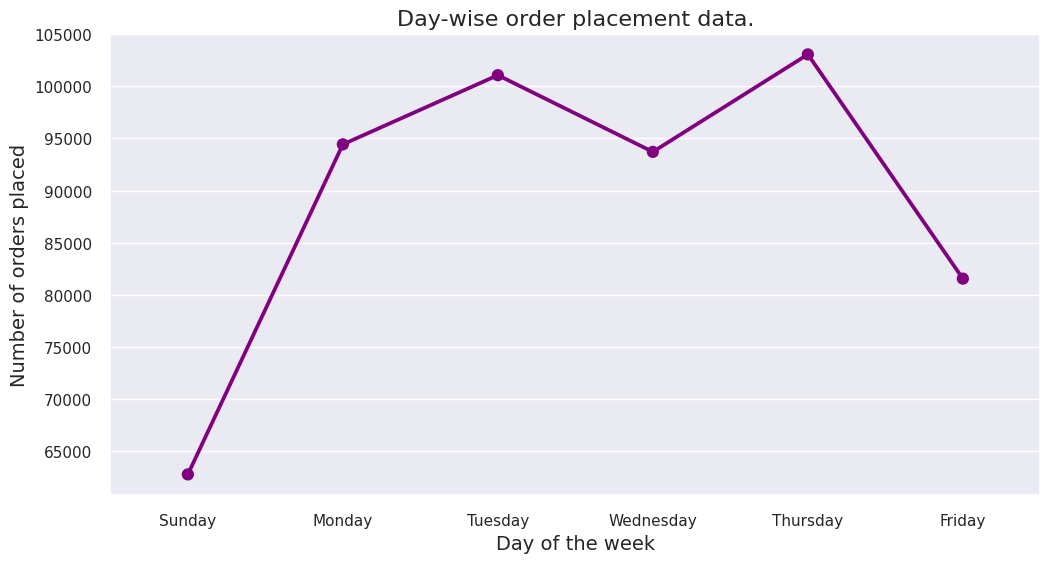

In [47]:
# Plotting this daily sales data.
plt.figure(figsize=(12,6))
sns.pointplot(x=day_df['Day'], y=day_df['count'], color='purple')

# Setting the title and x,y labels.
plt.title('Day-wise order placement data.', fontsize=16)
plt.xlabel('Day of the week', fontsize=14)
plt.ylabel('Number of orders placed', fontsize=14)


We can clearly see from the above graph that most orders were placed on Thursdays and there were no orders placed on Saturdays.



<Axes: >

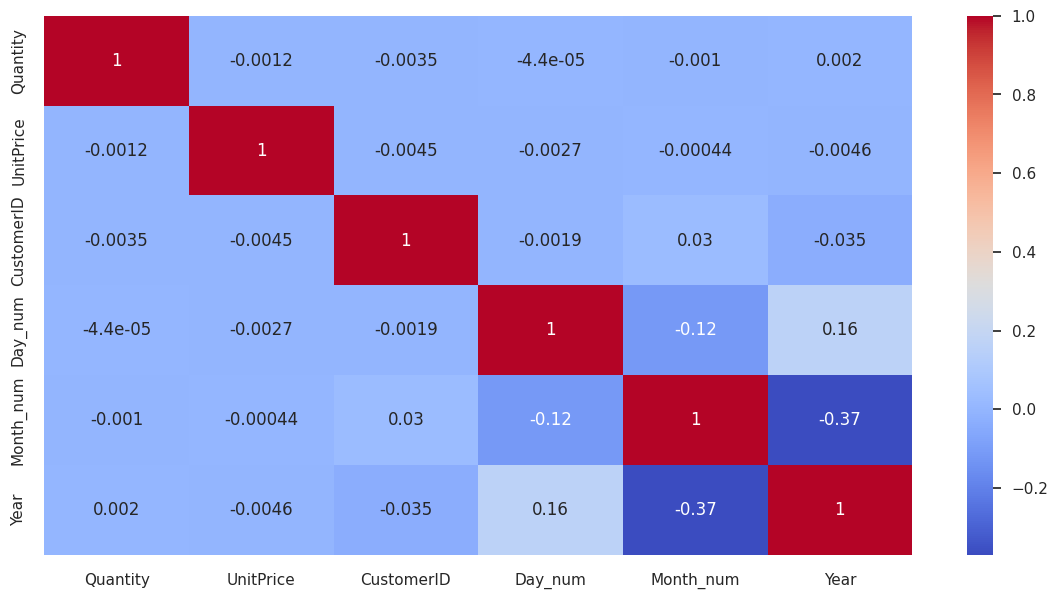

In [48]:
# Checking for correlation in our data.
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

## ***5. Feature Engineering & Data Pre-processing***

In [49]:
# Creating a copy of the dataset for further feature engineering
df=df.copy()

### 1. Handling Missing Values

In [50]:
# Handling Missing Values & Missing Value Imputation
# Missing Values/Null Values Count
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
Day_num             0
Month_num           0
Year                0
Month               0
Day                 0
dtype: int64


As we can see that there are some null values in description column and quite a lot of null values in our CustomerId column. We need to deal with these null values otherwise they will have an adverse impact on our modelling process. And seeing as our goal is to customer segmentation, we can't just impute values for customerId. So we will have to drop these null values.

In [51]:
df.dropna(inplace=True)

##***6. Create The RFM model (Recency, Frequency & Monetary value)***


Recency: How recently a customer has made a purchase.

Frequency: How often a customer makes a purchase.

Monetary Value: How much money a customer spends on

###**Recency**

In [52]:
ref_date = df.InvoiceDate.max()
ref_date

Timestamp('2011-12-09 12:50:00')

In [53]:
#timedelta function returns to total number of seconds
ref_date = ref_date + datetime.timedelta(days=1)

print(df.InvoiceDate.max(), df.InvoiceDate.min())
ref_date

2011-12-09 12:50:00 2010-12-01 08:26:00


Timestamp('2011-12-10 12:50:00')

We will construct a reference variable as number of days after the reference date when a customer last made a purchase.

In [54]:
df['days_since_last_purchase'] = ref_date- df.InvoiceDate
df['days_since_last_purchase_num'] = df['days_since_last_purchase'].astype('timedelta64[D]')
df['days_since_last_purchase_num'].head()

0    374.0
1    374.0
2    374.0
3    374.0
4    374.0
Name: days_since_last_purchase_num, dtype: float64

In [55]:
customer_history_df = df.groupby('CustomerID')['days_since_last_purchase_num'].min().reset_index()
customer_history_df.rename(columns={'days_since_last_purchase_num':'Recency'}, inplace=True)
customer_history_df.head()

,CustomerID,Recency
0,12346.0,326.0
1,12347.0,2.0
2,12348.0,75.0
3,12349.0,19.0
4,12350.0,310.0


In [56]:
customer_history_df.describe()

,CustomerID,Recency
count,4372.000000,4372.000000
mean,15299.677722,92.047118
std,1722.390705,100.765435
min,12346.000000,1.000000
25%,13812.750000,17.000000
50%,15300.500000,50.000000
75%,16778.250000,143.000000
max,18287.000000,374.000000


###**Monetary**

Monetary value refers to how much a customer spends on each transaction, and is usually measured by summing up the total value of their transactions.

In [57]:
df['Monetary'] = df['Quantity']*df['UnitPrice']

In [58]:
customer_monetary_val = df[['CustomerID','Monetary']].groupby('CustomerID').sum().reset_index()
customer_monetary_val.head()

,CustomerID,Monetary
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [59]:
customer_history_df=customer_history_df.merge(customer_monetary_val,how='outer')
customer_history_df.head()

,CustomerID,Recency,Monetary
0,12346.0,326.0,0.00
1,12347.0,2.0,4310.00
2,12348.0,75.0,1797.24
3,12349.0,19.0,1757.55
4,12350.0,310.0,334.40


###**Frequency**


Frequency refers to how often a customer makes a purchase, and is usually measured by counting the number of transactions they have made.



In [60]:
customer_freq = df[['CustomerID','Monetary']].groupby('CustomerID').count().reset_index()
customer_freq.rename(columns={'Monetary':'Frequency'},inplace=True)
customer_freq.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [61]:
customer_history_df=customer_history_df.merge(customer_freq,how='outer')
customer_history_df.head()

,CustomerID,Recency,Monetary,Frequency
0,12346.0,326.0,0.00,2
1,12347.0,2.0,4310.00,182
2,12348.0,75.0,1797.24,31
3,12349.0,19.0,1757.55,73
4,12350.0,310.0,334.40,17


In [62]:
customer_history_df

,CustomerID,Recency,Monetary,Frequency
0,12346.0,326.0,0.00,2
1,12347.0,2.0,4310.00,182
2,12348.0,75.0,1797.24,31
3,12349.0,19.0,1757.55,73
4,12350.0,310.0,334.40,17
...,...,...,...,...
4367,18280.0,278.0,180.60,10
4368,18281.0,181.0,80.82,7
4369,18282.0,8.0,176.60,13
4370,18283.0,4.0,2045.53,721


## ***7. QQ Plot***


In this code block, you are defining a function called QQ_plot that creates a probability plot and kernel density plot for a given set of data.

In [63]:
from scipy import stats
from scipy.stats import skew, norm, probplot, boxcox

In [64]:
def QQ_plot(data, measure):
    fig = plt.figure(figsize=(20,7))

    #Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(data)
      #Kernel Density plot
    fig1 = fig.add_subplot(121)
    sns.distplot(data, fit=norm)
    fig1.set_title(measure + ' Distribution ( mu = {:.2f} and sigma = {:.2f} )'.format(mu, sigma), loc='center')
    fig1.set_xlabel(measure)
    fig1.set_ylabel('Frequency')

    #QQ plot
    fig2 = fig.add_subplot(122)
    res = probplot(data, plot=fig2)
    fig2.set_title(measure + ' Probability Plot (skewness: {:.6f} and kurtosis: {:.6f} )'.format(data.skew(), data.kurt()), loc='center')

    plt.tight_layout()
    plt.show()

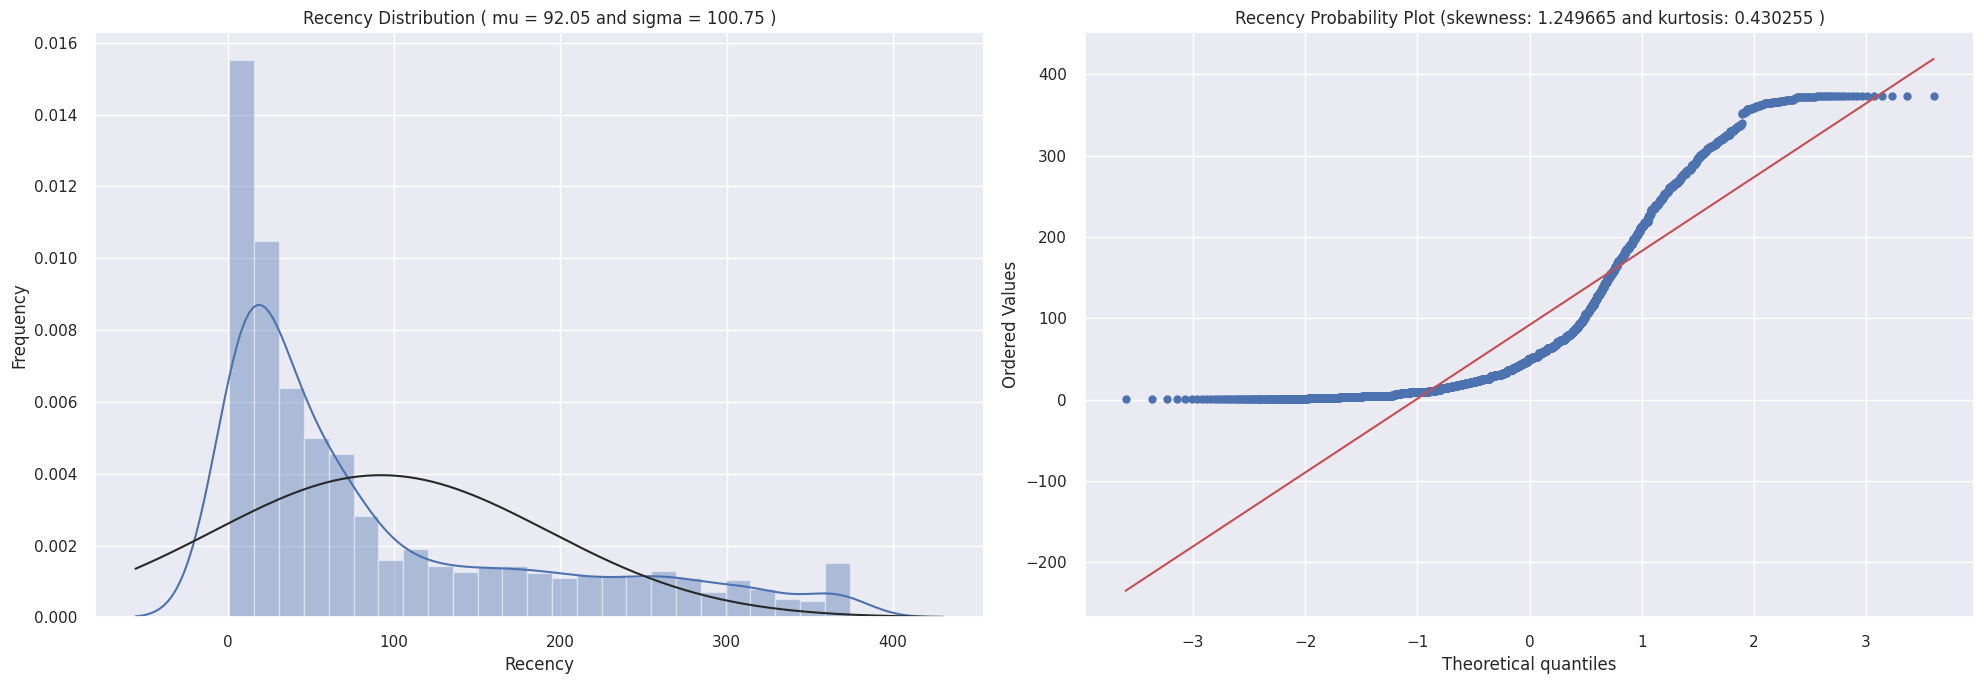

In [65]:
# Recency
QQ_plot(customer_history_df.Recency,'Recency')

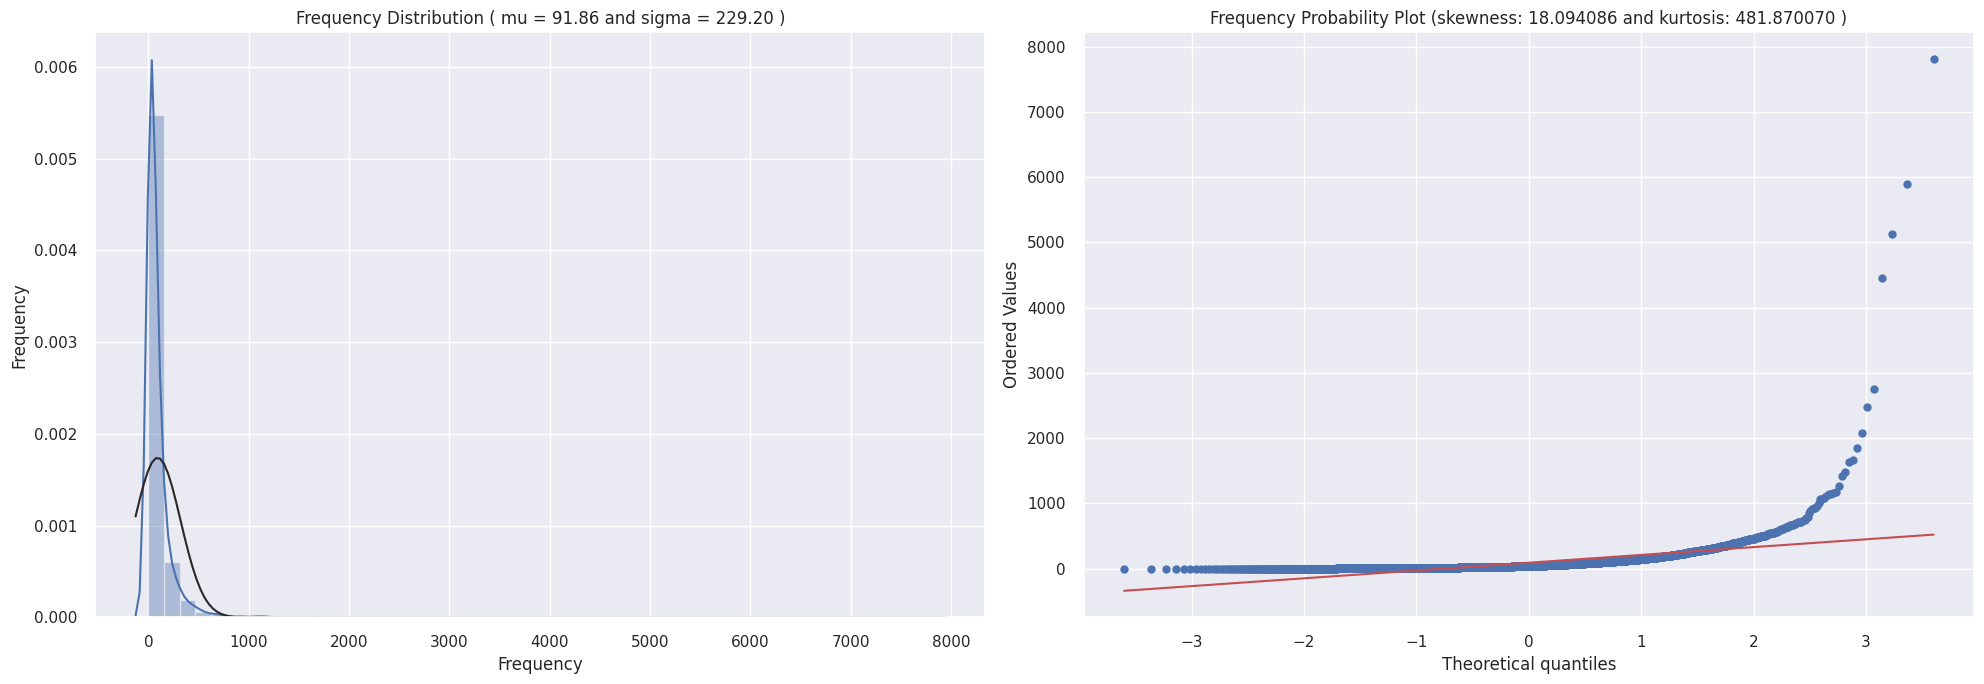

In [66]:
#Frequency
QQ_plot(customer_history_df.Frequency,'Frequency')

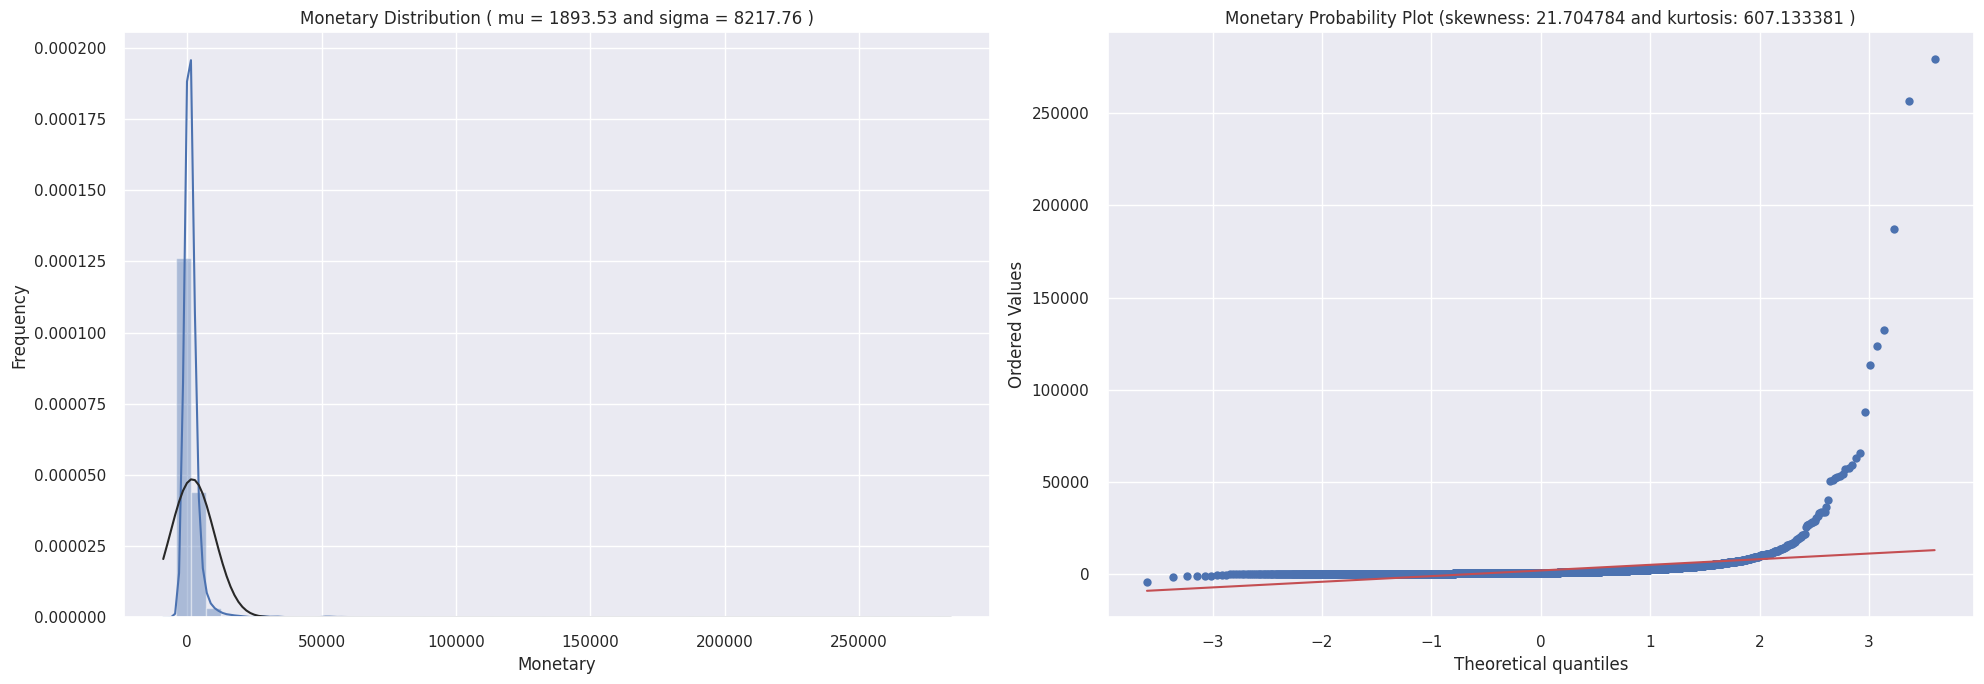

In [67]:
#Monetary
QQ_plot(customer_history_df.Monetary,'Monetary')

In [68]:
#Counts the number of values in the 'Monetary' column that are less than or equal to zero.
customer_history_df.Monetary[customer_history_df.Monetary<=0].count()

50

In [69]:
#Filters the customer_history_df DataFrame to exclude rows where the 'Monetary' value is equal to zero
customer_history_df = customer_history_df[customer_history_df.Monetary != 0]

In [70]:
customer_history_df.head(3)

,CustomerID,Recency,Monetary,Frequency
1,12347.0,2.0,4310.00,182
2,12348.0,75.0,1797.24,31
3,12349.0,19.0,1757.55,73


##***8. Checking outliers by plotting Box Plot for R-F-M (Recency, Frequency & Monetary).***

Text(0.5, 0, 'Attribute - Recency')

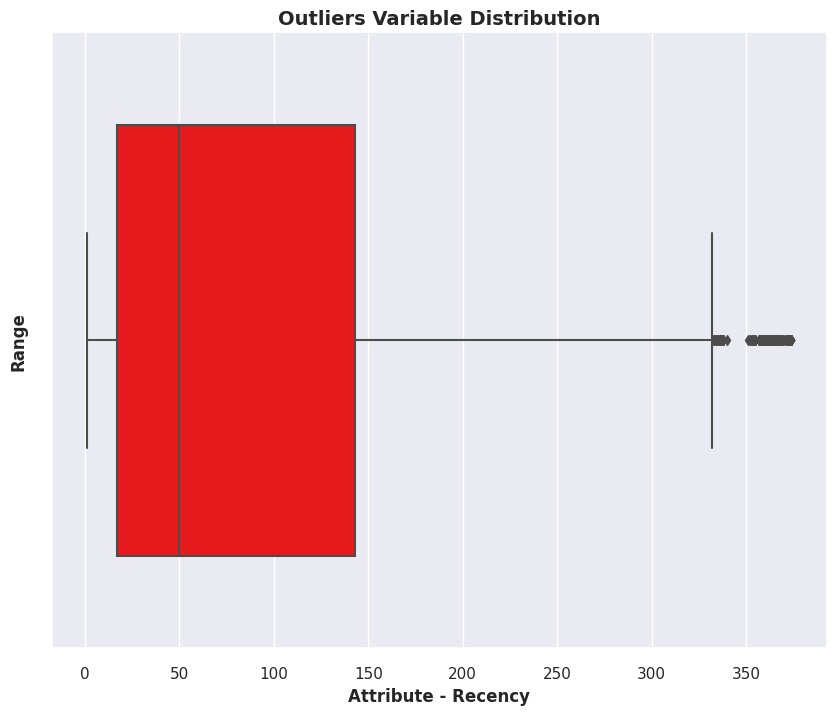

In [71]:
# Box plot of Recency
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(x = customer_history_df['Recency'], orient="v", palette="Set1" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attribute - Recency", fontweight = 'bold')

Text(0.5, 0, 'Attribute - Monetary')

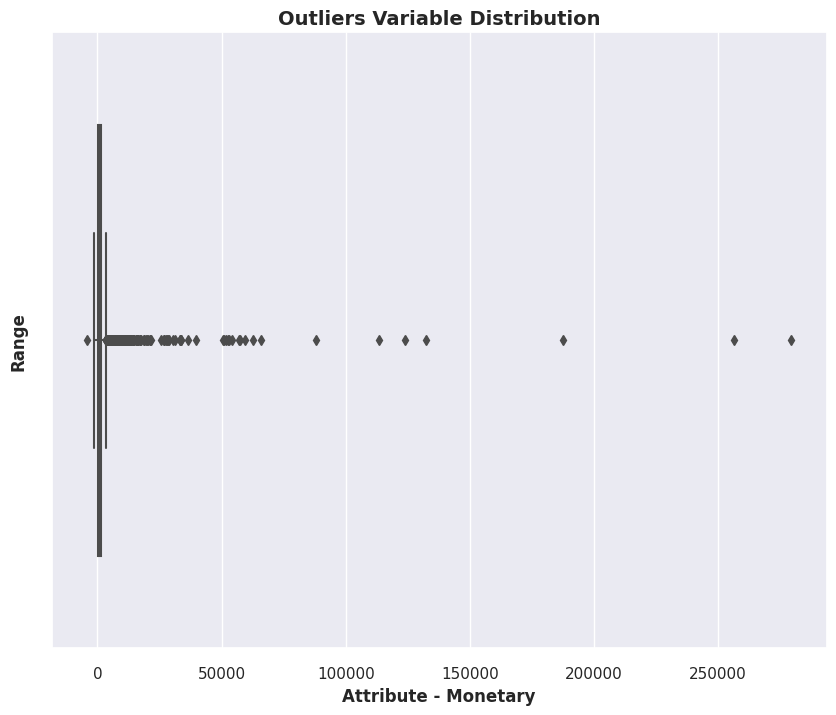

In [72]:
# Box plot of Monetary
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(x = customer_history_df['Monetary'], orient="v", palette="Set1" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attribute - Monetary", fontweight = 'bold')

Text(0.5, 0, 'Attribute - Frequency')

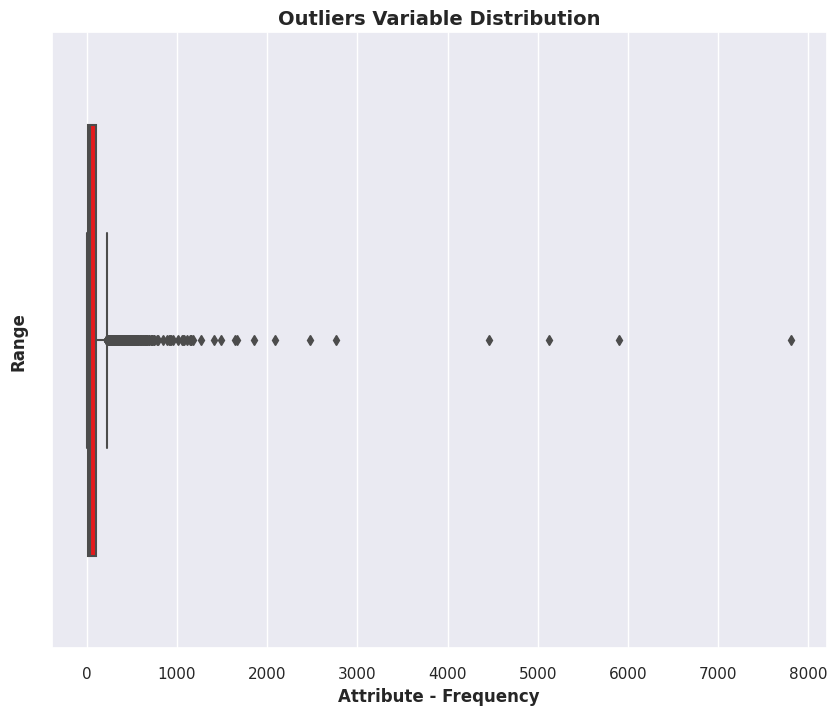

In [73]:
# Box plot of Frequency
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(x = customer_history_df['Frequency'], orient="v", palette="Set1" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attribute - Frequency", fontweight = 'bold')

**Removing Outliers by using IQR process**


In [74]:
# removing (statistical) outliers
Q1 = customer_history_df.Monetary.quantile(0.05)
Q3 = customer_history_df.Monetary.quantile(0.95)
IQR = Q3 - Q1
customer_history_df = customer_history_df[(customer_history_df.Monetary >= Q1 - 1.5*IQR) & (customer_history_df.Monetary <= Q3 + 1.5*IQR)]


In [75]:
# outlier treatment for recency
Q1 = customer_history_df.Recency.quantile(0.05)
Q3 = customer_history_df.Recency.quantile(0.95)
IQR = Q3 - Q1
customer_history_df = customer_history_df[(customer_history_df.Recency >= Q1 - 1.5*IQR) & (customer_history_df.Recency <= Q3 + 1.5*IQR)]

In [76]:
# outlier treatment for frequency
Q1 = customer_history_df.Frequency.quantile(0.05)
Q3 = customer_history_df.Frequency.quantile(0.95)
IQR = Q3 - Q1
customer_history_df = customer_history_df[(customer_history_df.Frequency >= Q1 - 1.5*IQR) & (customer_history_df.Frequency <= Q3 + 1.5*IQR)]

###  Data Scaling

In [77]:
# Scaling
rfm_df = customer_history_df[['Monetary', 'Frequency', 'Recency']]

# instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(4287, 3)

In [78]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Monetary', 'Frequency', 'Recency']
rfm_df_scaled.head()

,Monetary,Frequency,Recency
0,1.733113,1.055324,-0.906060
1,0.300851,-0.460598,-0.183284
2,0.278228,-0.038951,-0.737742
3,-0.532962,-0.601147,2.143462
4,0.157309,0.181912,-0.569425


##### Which method have you used to scale you data and why?

I have used Standard scalar for standardization.When we use standardization each feature will be converted to have  zero-mean, unit standard-deviation.

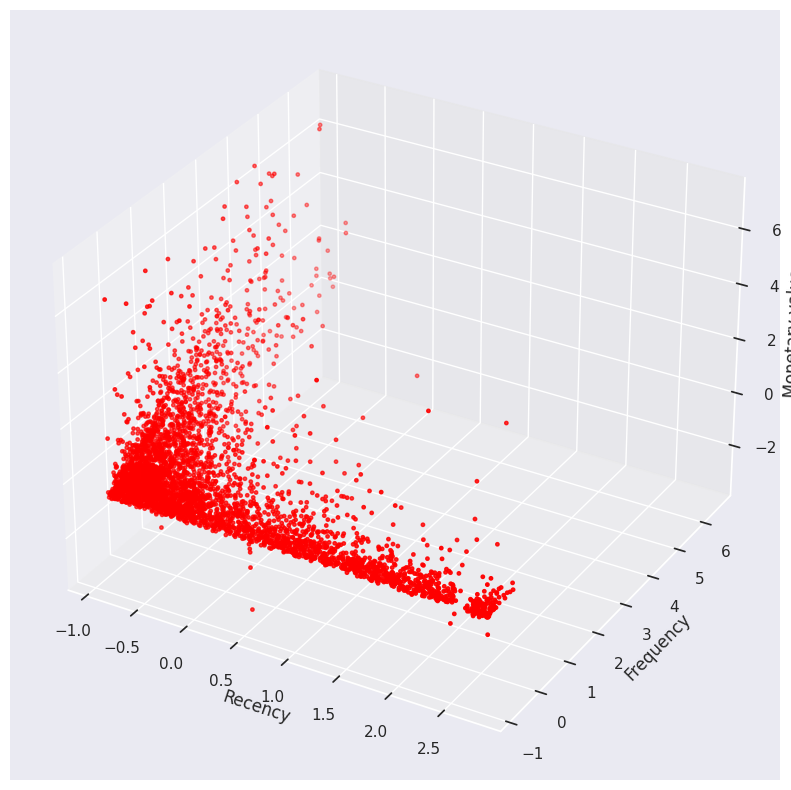

In [79]:
# Importing Library for 3D plot
from mpl_toolkits.mplot3d import Axes3D

# set fig size
fig=plt.figure(figsize=(12,10))

# syntax for 3-D plotting
ax=fig.add_subplot(111,projection='3d')

# syntax for plotting
xs = rfm_df_scaled.Recency
ys = rfm_df_scaled.Frequency
zs = rfm_df_scaled.Monetary
ax.scatter(xs,ys,zs,s=6, color='red')

# set x, y & z label
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary value')

# show the plot
plt.show()

## ***9. ML Model Implementation***

### ML Model - 1 - **Implementing K Means Clustering**

K-means clustering is a popular unsupervised machine learning algorithm used for clustering or grouping similar data points into clusters. The goal of K-means is to partition a dataset into K clusters, where each data point belongs to the cluster with the nearest mean (centroid).

Silhouette Analysis

silhouette score = (p-q)/max(p,q)

p is the mean distance to the points in the nearest cluster that the data point is not a part of

q is the mean intra-cluster distance to all the points in its own cluster.

The value of the silhouette score range lies between -1 to 1.

Score closer to 1 indicates that the data point is very similar to other data points in the cluster,

Score closer to -1 indicates that the data point is not similar to the data points in its cluster.



Let's see below how our data perform for each K clusters groups (3, 5 and 7) in the silhouette score of each cluster, along with the center of each of the cluster discovered in the scatter plots, by amount_log vs recency_log and vs frequency_log.

SilhouetteVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=3))

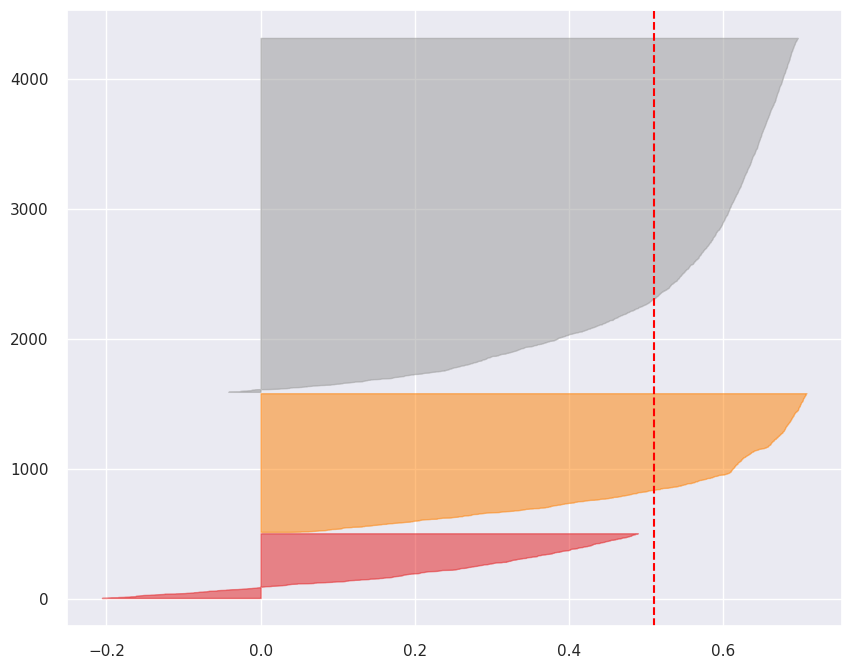

In [80]:
silhouette_model = SilhouetteVisualizer(KMeans(3))
silhouette_model.fit(rfm_df_scaled)

SilhouetteVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=4))

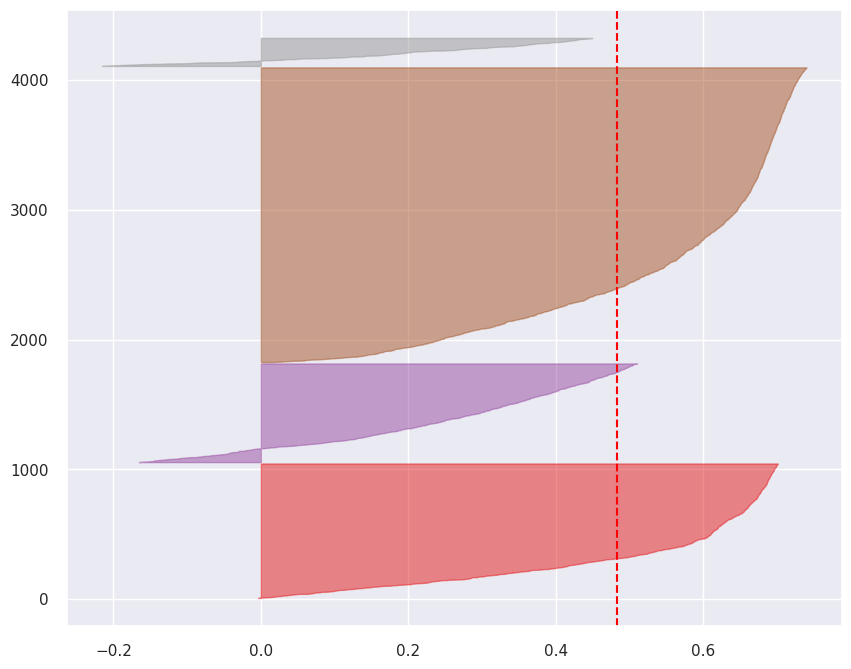

In [81]:
silhouette_model = SilhouetteVisualizer(KMeans(4))
silhouette_model.fit(rfm_df_scaled)

SilhouetteVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=5))

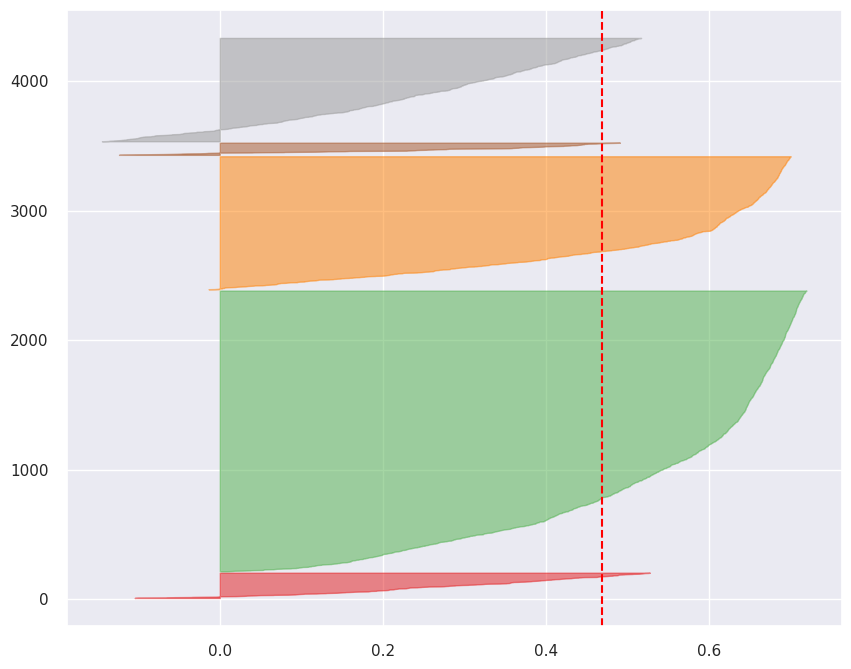

In [82]:
silhouette_model = SilhouetteVisualizer(KMeans(5))
silhouette_model.fit(rfm_df_scaled)

**Finding best value for K**

A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered.

The Elbow Method

Using the elbow method to find the optimal number of clusters.

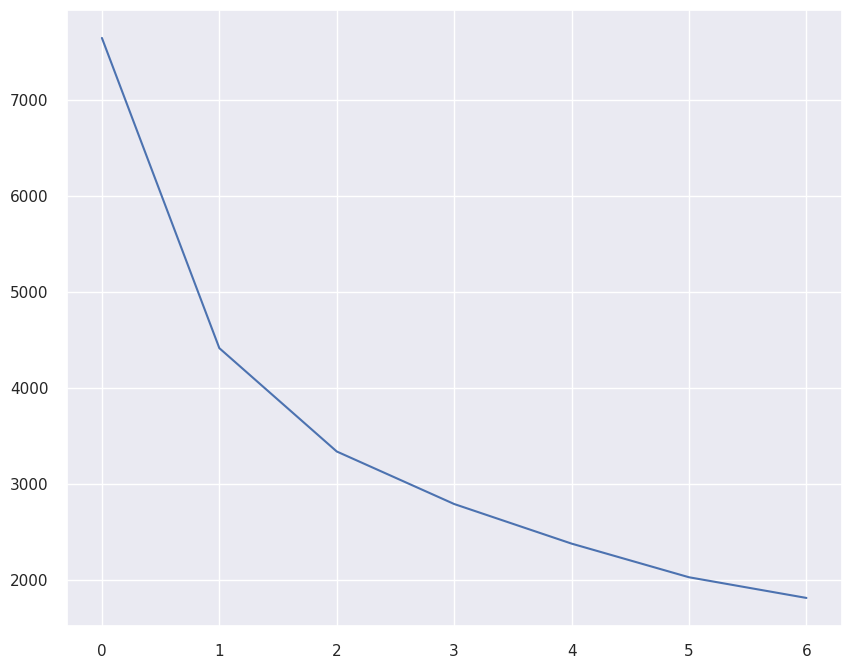

In [83]:
# elbow-curve/SSD
elbow_curve = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, max_iter=50)
    kmeans.fit(rfm_df_scaled)

    elbow_curve.append(kmeans.inertia_)

# plot the SSDs for each n_clusters
# ssd
plt.plot(elbow_curve)


From the above plot, we can see that the optimal number of clusters is 3 or 4.

In [84]:
# silhouette analysis
i = [2, 3, 4, 5, 6, 7, 8]

for k in i:

    # intialise kmeans
    kmeans = KMeans(n_clusters=k, max_iter=50)
    kmeans.fit(rfm_df_scaled)

    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(k, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5435055845919521
For n_clusters=3, the silhouette score is 0.5096782155560377
For n_clusters=4, the silhouette score is 0.4822024162895052
For n_clusters=5, the silhouette score is 0.46884036178404137
For n_clusters=6, the silhouette score is 0.41902699840616364
For n_clusters=7, the silhouette score is 0.41570905778477224
For n_clusters=8, the silhouette score is 0.4034772634053743


In [85]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [86]:
kmeans.labels_

array([1, 0, 0, ..., 0, 1, 0], dtype=int32)

In [87]:
# assign the label
customer_history_df['cluster_id'] = kmeans.labels_
customer_history_df.head()

,CustomerID,Recency,Monetary,Frequency,cluster_id
1,12347.0,2.0,4310.00,182,1
2,12348.0,75.0,1797.24,31,0
3,12349.0,19.0,1757.55,73,0
4,12350.0,310.0,334.40,17,2
5,12352.0,36.0,1545.41,95,0


####**Creating Box Plot for R-M-F with respect to Cluster_id.**

<Axes: xlabel='cluster_id', ylabel='Recency'>

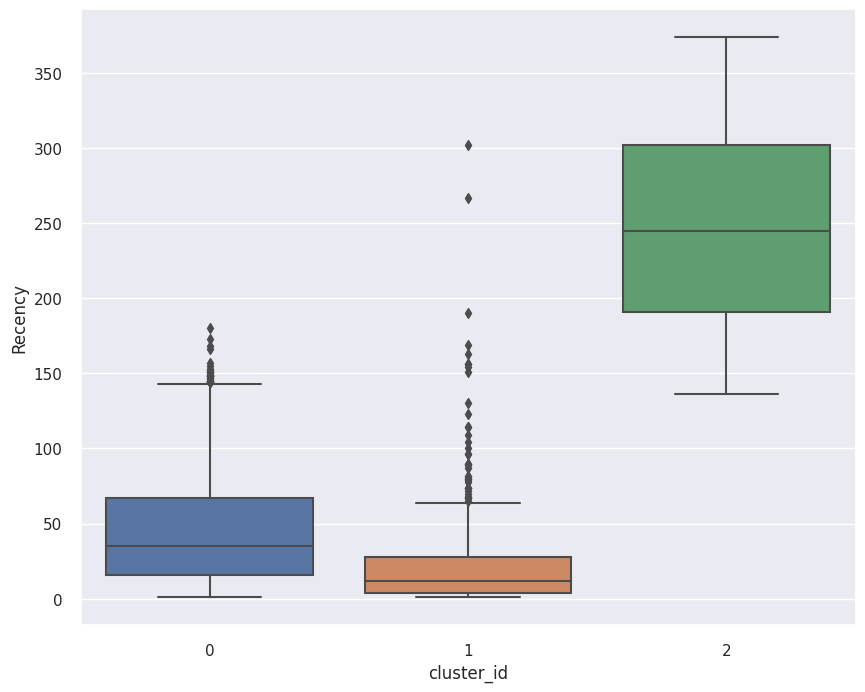

In [88]:
# plot
sns.boxplot(x='cluster_id', y='Recency', data=customer_history_df)

<Axes: xlabel='cluster_id', ylabel='Monetary'>

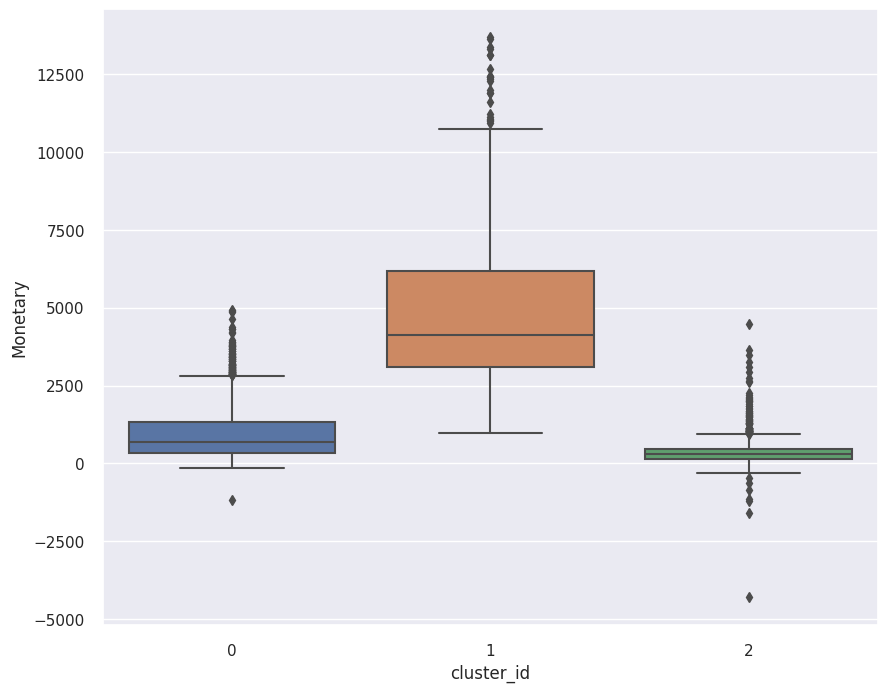

In [89]:
# plot
sns.boxplot(x='cluster_id', y='Monetary', data=customer_history_df)

<Axes: xlabel='cluster_id', ylabel='Frequency'>

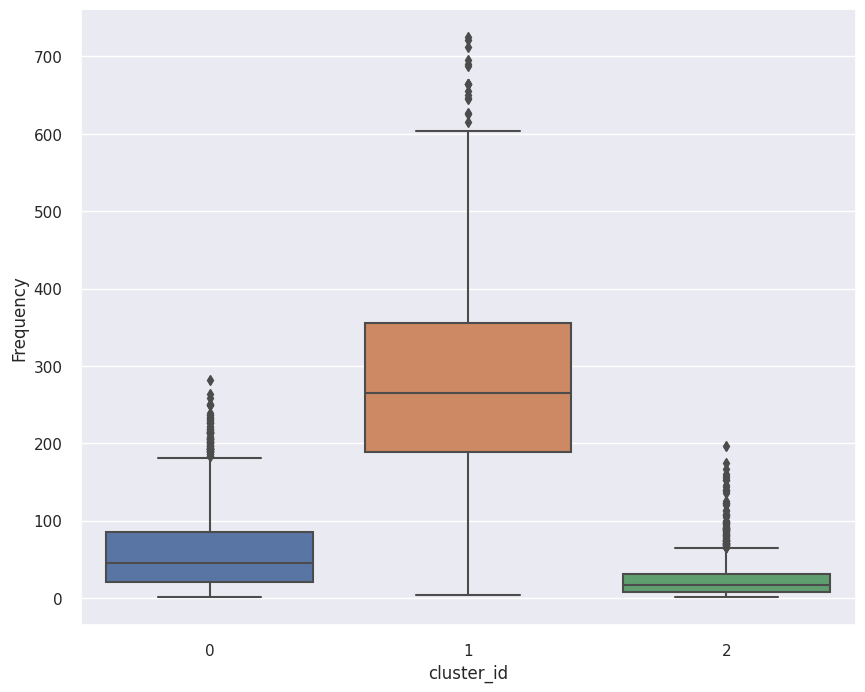

In [90]:
# plot
sns.boxplot(x='cluster_id', y='Frequency', data=customer_history_df)

###ML Model - 2 - **Implementing Hierarchial Clustering**

Hierarchical clustering is a clustering algorithm that creates a hierarchy of clusters by iteratively merging or splitting them based on their similarity. It starts with each data point as a separate cluster and combines clusters recursively until reaching a desired number or hierarchy. It does not require a predefined number of clusters.

In [91]:
rfm_df_scaled.head()

,Monetary,Frequency,Recency
0,1.733113,1.055324,-0.906060
1,0.300851,-0.460598,-0.183284
2,0.278228,-0.038951,-0.737742
3,-0.532962,-0.601147,2.143462
4,0.157309,0.181912,-0.569425


In [92]:
customer_history_df.head()

,CustomerID,Recency,Monetary,Frequency,cluster_id
1,12347.0,2.0,4310.00,182,1
2,12348.0,75.0,1797.24,31,0
3,12349.0,19.0,1757.55,73,0
4,12350.0,310.0,334.40,17,2
5,12352.0,36.0,1545.41,95,0


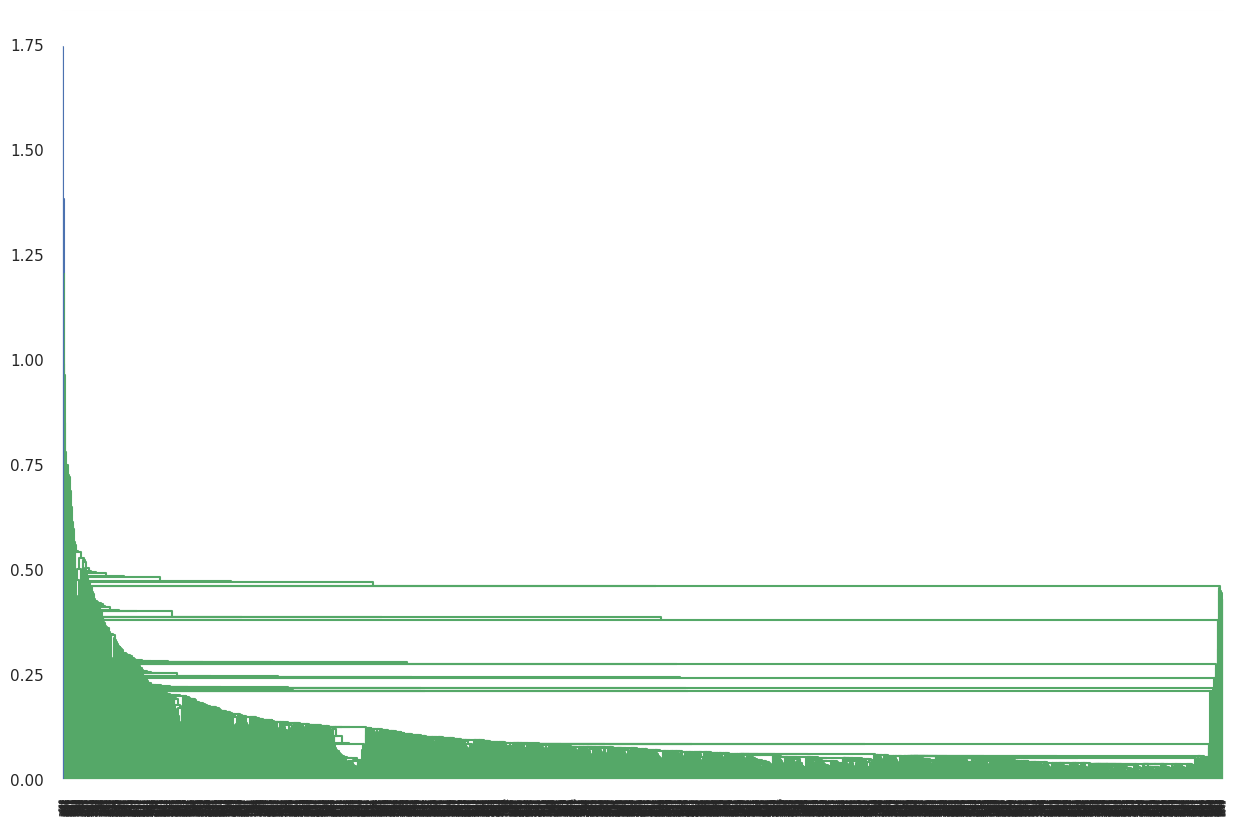

In [93]:
#Generates a dendrogram visualization for the hierarchical clustering of the scaled RFM data.
#Single Linkage:- it considers the minimum distance between any two points in different clusters
import sys
sys.setrecursionlimit(5000)

plt.figure(figsize=(15,10))
mergings = linkage(rfm_df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()


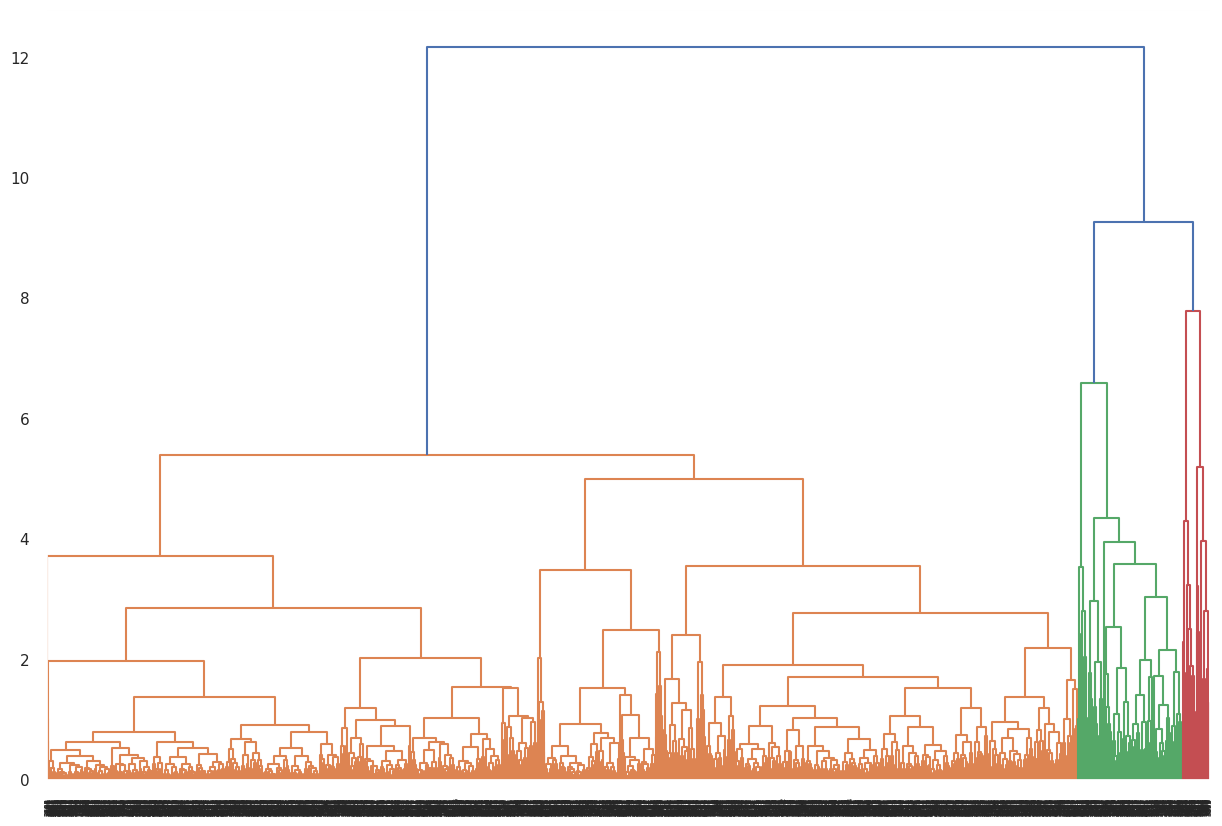

In [94]:
#Generates a dendrogram visualization for hierarchical clustering
#Complete Linkage:- it considers the maximum distance between any two points in different clusters.
plt.figure(figsize=(15,10))
mergings = linkage(rfm_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()


From the above dendogram plot, we can see the distribution of recency, frequency, and monetary metric values across the different clusters. So the 3 clusters seem to be separate from each other, which indicates a good heterogeneous mix of clusters.

In [95]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, ..., 1, 0, 1])

In [96]:
# assign cluster labels
customer_history_df['cluster_labels'] = cluster_labels
customer_history_df.head(6)

,CustomerID,Recency,Monetary,Frequency,cluster_id,cluster_labels
1,12347.0,2.0,4310.00,182,1,0
2,12348.0,75.0,1797.24,31,0,1
3,12349.0,19.0,1757.55,73,0,1
4,12350.0,310.0,334.40,17,2,1
5,12352.0,36.0,1545.41,95,0,1
6,12353.0,204.0,89.00,4,2,1


<Axes: xlabel='cluster_labels', ylabel='Recency'>

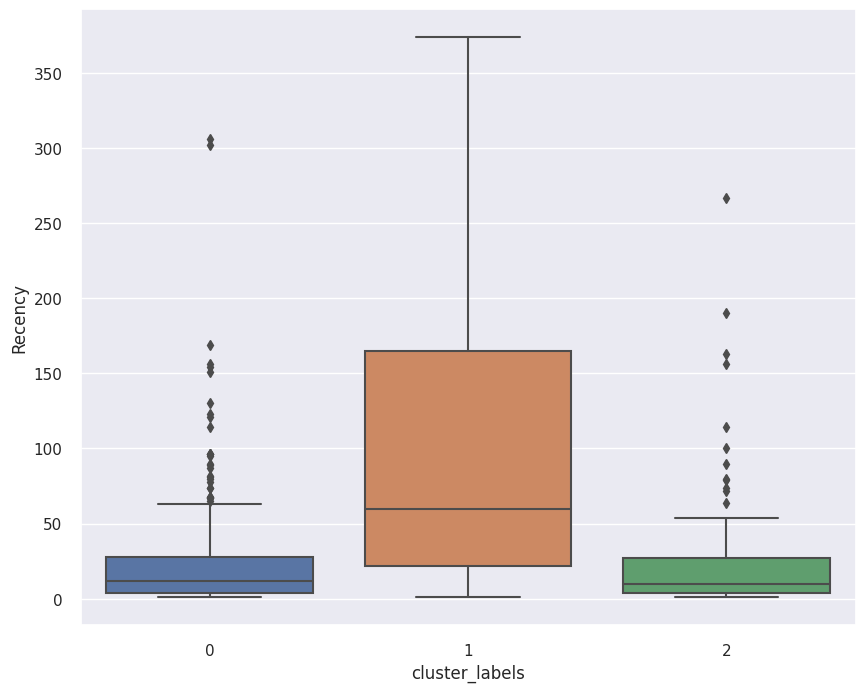

In [97]:
# plots
sns.boxplot(x='cluster_labels', y='Recency', data=customer_history_df)

<Axes: xlabel='cluster_labels', ylabel='Monetary'>

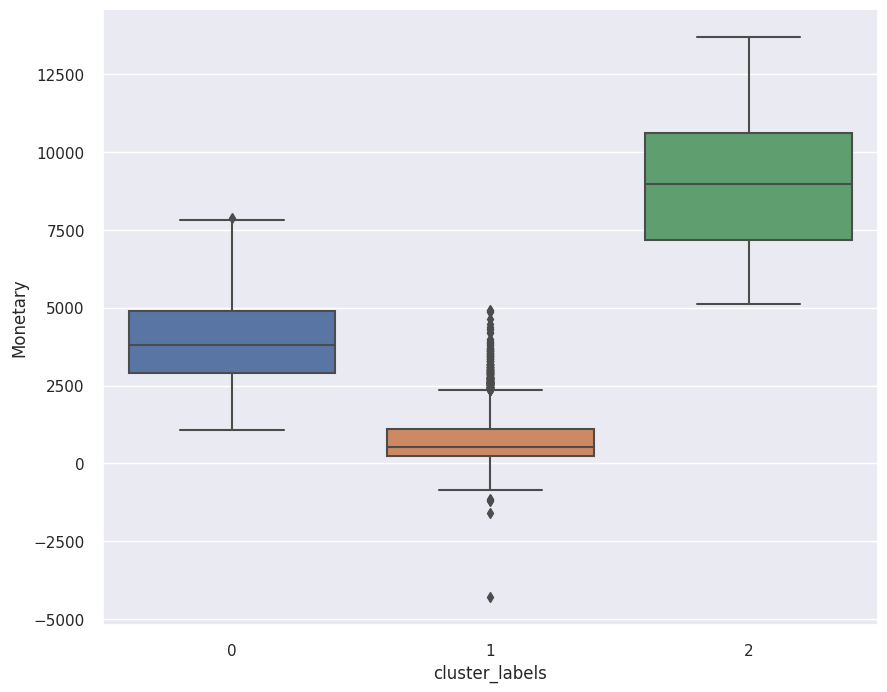

In [98]:
# plots
sns.boxplot(x='cluster_labels', y='Monetary', data=customer_history_df)

<Axes: xlabel='cluster_labels', ylabel='Frequency'>

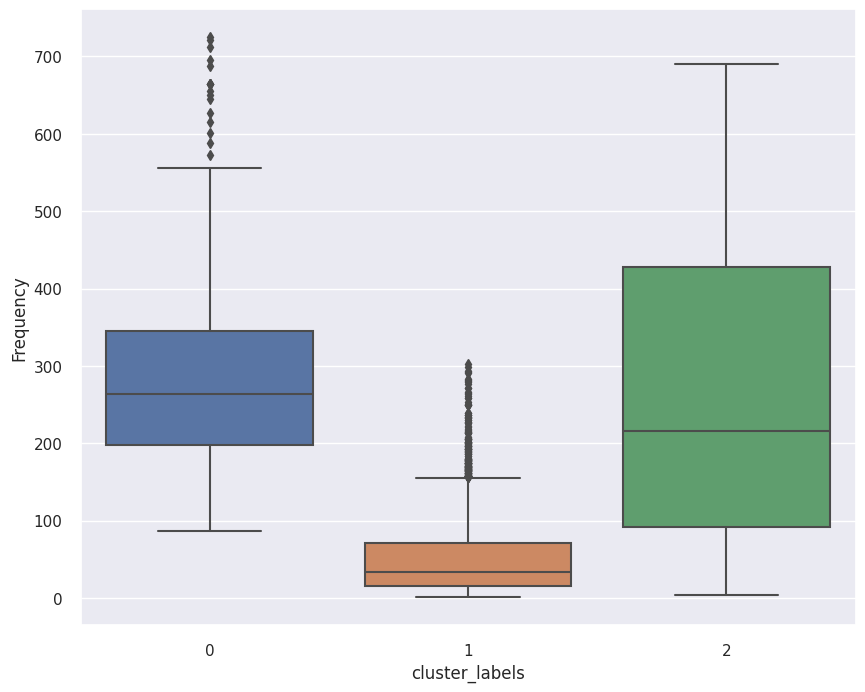

In [99]:
# plots
sns.boxplot(x='cluster_labels', y='Frequency', data=customer_history_df)

## ***9. 3-D Visualisation of R-F-M***

In [100]:
### visualize the result
import plotly.express as px
fig = px.scatter_3d(customer_history_df, x='Recency', y='Frequency', z='Monetary',
              color='cluster_labels')
fig.show()

CHALLENGES
• Large Dataset to handle.

• Needs to plot lot of Graphs to analyze.

• Lot of NaN values & duplicate values.

• Continuous Runtime and RAM Crash due to large dataset.

• Find out the right number of ‘K’ for clusters.

# **Solution to Business Objective**


**RFM analysis can segment customers into homogenous group quickly with set of minimum variables. Scoring system can be defined and ranged differently. We get a better result for clustering steps by applying scoring rather than using the raw calculated RFM values. Therefore, segmenting should be done by RFM scoring and further analysis on the spending behavior should be done on the raw values for the targeted cluster to expose more insight and characteristics.**

 **RFM analysis solely depends on purchasing behavior and histories, analysis can be further improved by exploring weighted composite scoring or including customer demographic information and product information. A good analysis can increase effectiveness and efficiency of marketing plans, hence increase profitability at minimum cost**

# **CONCLUSION**

**To conclude, we saw how we can segment our customer depending on our business requirements. You can perform RFM for your entire customer base, or just a subset. For example, you may first segment customers based on a geographical area or other demographics, and then by RFM for historical, transaction-based behaviour segments.**

**Customer Segmentation is one the most important applications of unsupervised learning. Using clustering techniques, companies can identify the several segments of customers allowing them to target the potential user base**.

**Segmentation enables you to target customers with the highest potential value first, so you get the most out of your marketing budget. Customer segmentation helps you understand what your users need. You can identify the most active users/customers, and optimize your application/offer towards their needs.**

  **RFM analysis can help in answering many questions with respect to their customers and this can help companies to make marketing strategies for their customers, retaining their slipping customers and providing recommendations to their customer based on their interest. We used the K-means algorithm to segment our customer in various clusters having similar similarity. I think K-means did a pretty good job here.**

### ***Thank You So Much***